<a href="https://colab.research.google.com/github/turukano26/SimpleNotebooks/blob/main/lastfm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install palettable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 5.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import random
import palettable

Mounted at /content/drive/


In [ ]:
def plot_user(top_n : int, username : str):

    try:
        data = pd.read_csv('drive/MyDrive/data/' + username + '.csv', header=None)
    except:
        print("No file found for user " + username)
        return
    a = data.to_numpy()

    plt.rcParams["figure.figsize"] = (30,30)
    fig, ax = plt.subplots(3)
    titles = ["Artists", "Albums", "Songs"]
    fig.suptitle(username, fontsize=30)

    for column_num in range(3):

        names, counts = np.unique(a[:,column_num].astype(str), return_counts=True)
        top_names = np.flip(names[np.argsort(counts)])[0:top_n]
        top_artist_counts = np.flip(counts[np.argsort(counts)])[0:top_n]
        weeks = np.arange(pd.to_datetime(a[-1][3]).to_numpy(), pd.Timestamp.now().to_numpy(), np.timedelta64(1, 'W'), dtype='datetime64[D]')

        print(top_names, top_artist_counts)

        d = []
        avg_dates_for_names = []
        for artist in top_names:

            matching_entries = a[a[:,column_num] == artist]
            if artist == 'nan':
                print(a[a[:,column_num].astype(str) == artist])
            dates = pd.to_datetime(matching_entries[:,3])
            d.append(dates)
            avg_dates_for_names.append(dates.mean())

        if top_n <= 10:
            colors = plt.color_sequences.get('tab10')[0:top_n]
            #colors = palettable.mycarta.Cube1_10.mpl_colors
        else:
            colors = plt.color_sequences.get('tab20')[0:top_n]

        #colors = np.array(colors)[np.argsort(avg_dates_for_names)]


        ax[column_num].hist(d, bins=weeks, histtype='barstacked', color=colors)
        ax[column_num].set_title(titles[column_num])
        ax[column_num].legend(top_names)

    plt.show()



def plot_distribution(top_n : int, username : str, name : str, column_num : int):

    try:
        data = pd.read_csv('drive/MyDrive/data/' + username + '.csv', header=None)
    except:
        print("No file found for user " + username)
        return
    a = data.to_numpy()

    plt.rcParams["figure.figsize"] = (20,3)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3, 3, 1]})

    weeks = np.arange(pd.to_datetime(a[-1][3]).to_numpy(), pd.Timestamp.now().to_numpy(), np.timedelta64(1, 'W'), dtype='datetime64[D]')

    d = []

    matching_entries = a[a[:,column_num] == name]
    dates = pd.to_datetime(matching_entries[:,3])
    d.append(dates)

    j,k = np.histogram(dates, bins=weeks)
    j = np.sort(j)


    #plt.yscale('log')
    ax1.bar(range(len(j)), height=j)
    ax2.hist(d, bins=weeks)
    ax3.text(0.1, 0.85,name,horizontalalignment='left',verticalalignment='center',transform = ax3.transAxes, size='large')
    ax3.axis('off')
    plt.plot()


def plot_top_n_distributions(top_n : int, username : str, column_num : int):
    try:
        data = pd.read_csv('drive/MyDrive/data/' + username + '.csv', header=None)
    except:
        print("No file found for user " + username)
        return
    a = data.to_numpy()
    names, counts = np.unique(a[:,column_num].astype(str), return_counts=True)
    top_names = np.flip(names[np.argsort(counts)])[0:top_n]
    top_artist_counts = np.flip(counts[np.argsort(counts)])[0:top_n]

    for name in top_names:
        plot_distribution(top_n, username, name, column_num)


In [ ]:
plt.color_sequences.get('gist_rainbow')
palettable.mycarta.Cube1_10.mpl_colors

[(0.47058823529411764, 0.0, 0.5215686274509804),
 (0.5058823529411764, 0.17647058823529413, 0.8235294117647058),
 (0.40784313725490196, 0.43529411764705883, 0.984313725490196),
 (0.2980392156862745, 0.6196078431372549, 0.8509803921568627),
 (0.24313725490196078, 0.7607843137254902, 0.6274509803921569),
 (0.3254901960784314, 0.8588235294117647, 0.36470588235294116),
 (0.5215686274509804, 0.9215686274509803, 0.3137254901960784),
 (0.7647058823529411, 0.9254901960784314, 0.34901960784313724),
 (0.9019607843137255, 0.8235294117647058, 0.36470588235294116),
 (0.9764705882352941, 0.5882352941176471, 0.3568627450980392)]

['Sum 41' 'blink-182' 'The Velvet Underground' 'Death Cab for Cutie'
 'The Beatles' 'Mother Mother' 'The Shins' 'C418' 'Elliott Smith'
 'The Strokes'] [2325 1618 1230  778  661  657  594  569  558  537]
['Underclass Hero' 'Does This Look Infected?' 'Chuck' 'California'
 'Minecraft - Volume Alpha' 'Is This It' 'O My Heart' 'blink-182' 'nan'
 'Transatlanticism'] [721 590 579 554 493 433 427 406 349 349]
[['Possible History' nan
  'Every Claimant To Rome Ever; How Rome Finally Fell in 2011'
  '13 Jul 2023 07:13']
 ['Inside the Battle' nan 'Pursuing the Routed Enemy' '11 Jul 2023 11:03']
 ['Inside the Battle' nan 'Variations in the model' '11 Jul 2023 11:01']
 ...
 ['The Walters' nan 'I Love You So' '01 Dec 2017 07:39']
 ['The Walters' nan 'I Love You So' '01 Dec 2017 07:32']
 ['Mild High Club' nan 'Chapel Perilous' '07 Nov 2017 06:43']]
['Stephanie Says' 'I Miss You' 'Pale Blue Eyes' 'Mr. Brightside'
 'Always See Your Face' 'This Must Be My Exit' 'There She Goes'
 'Waterloo Sunset - Stere

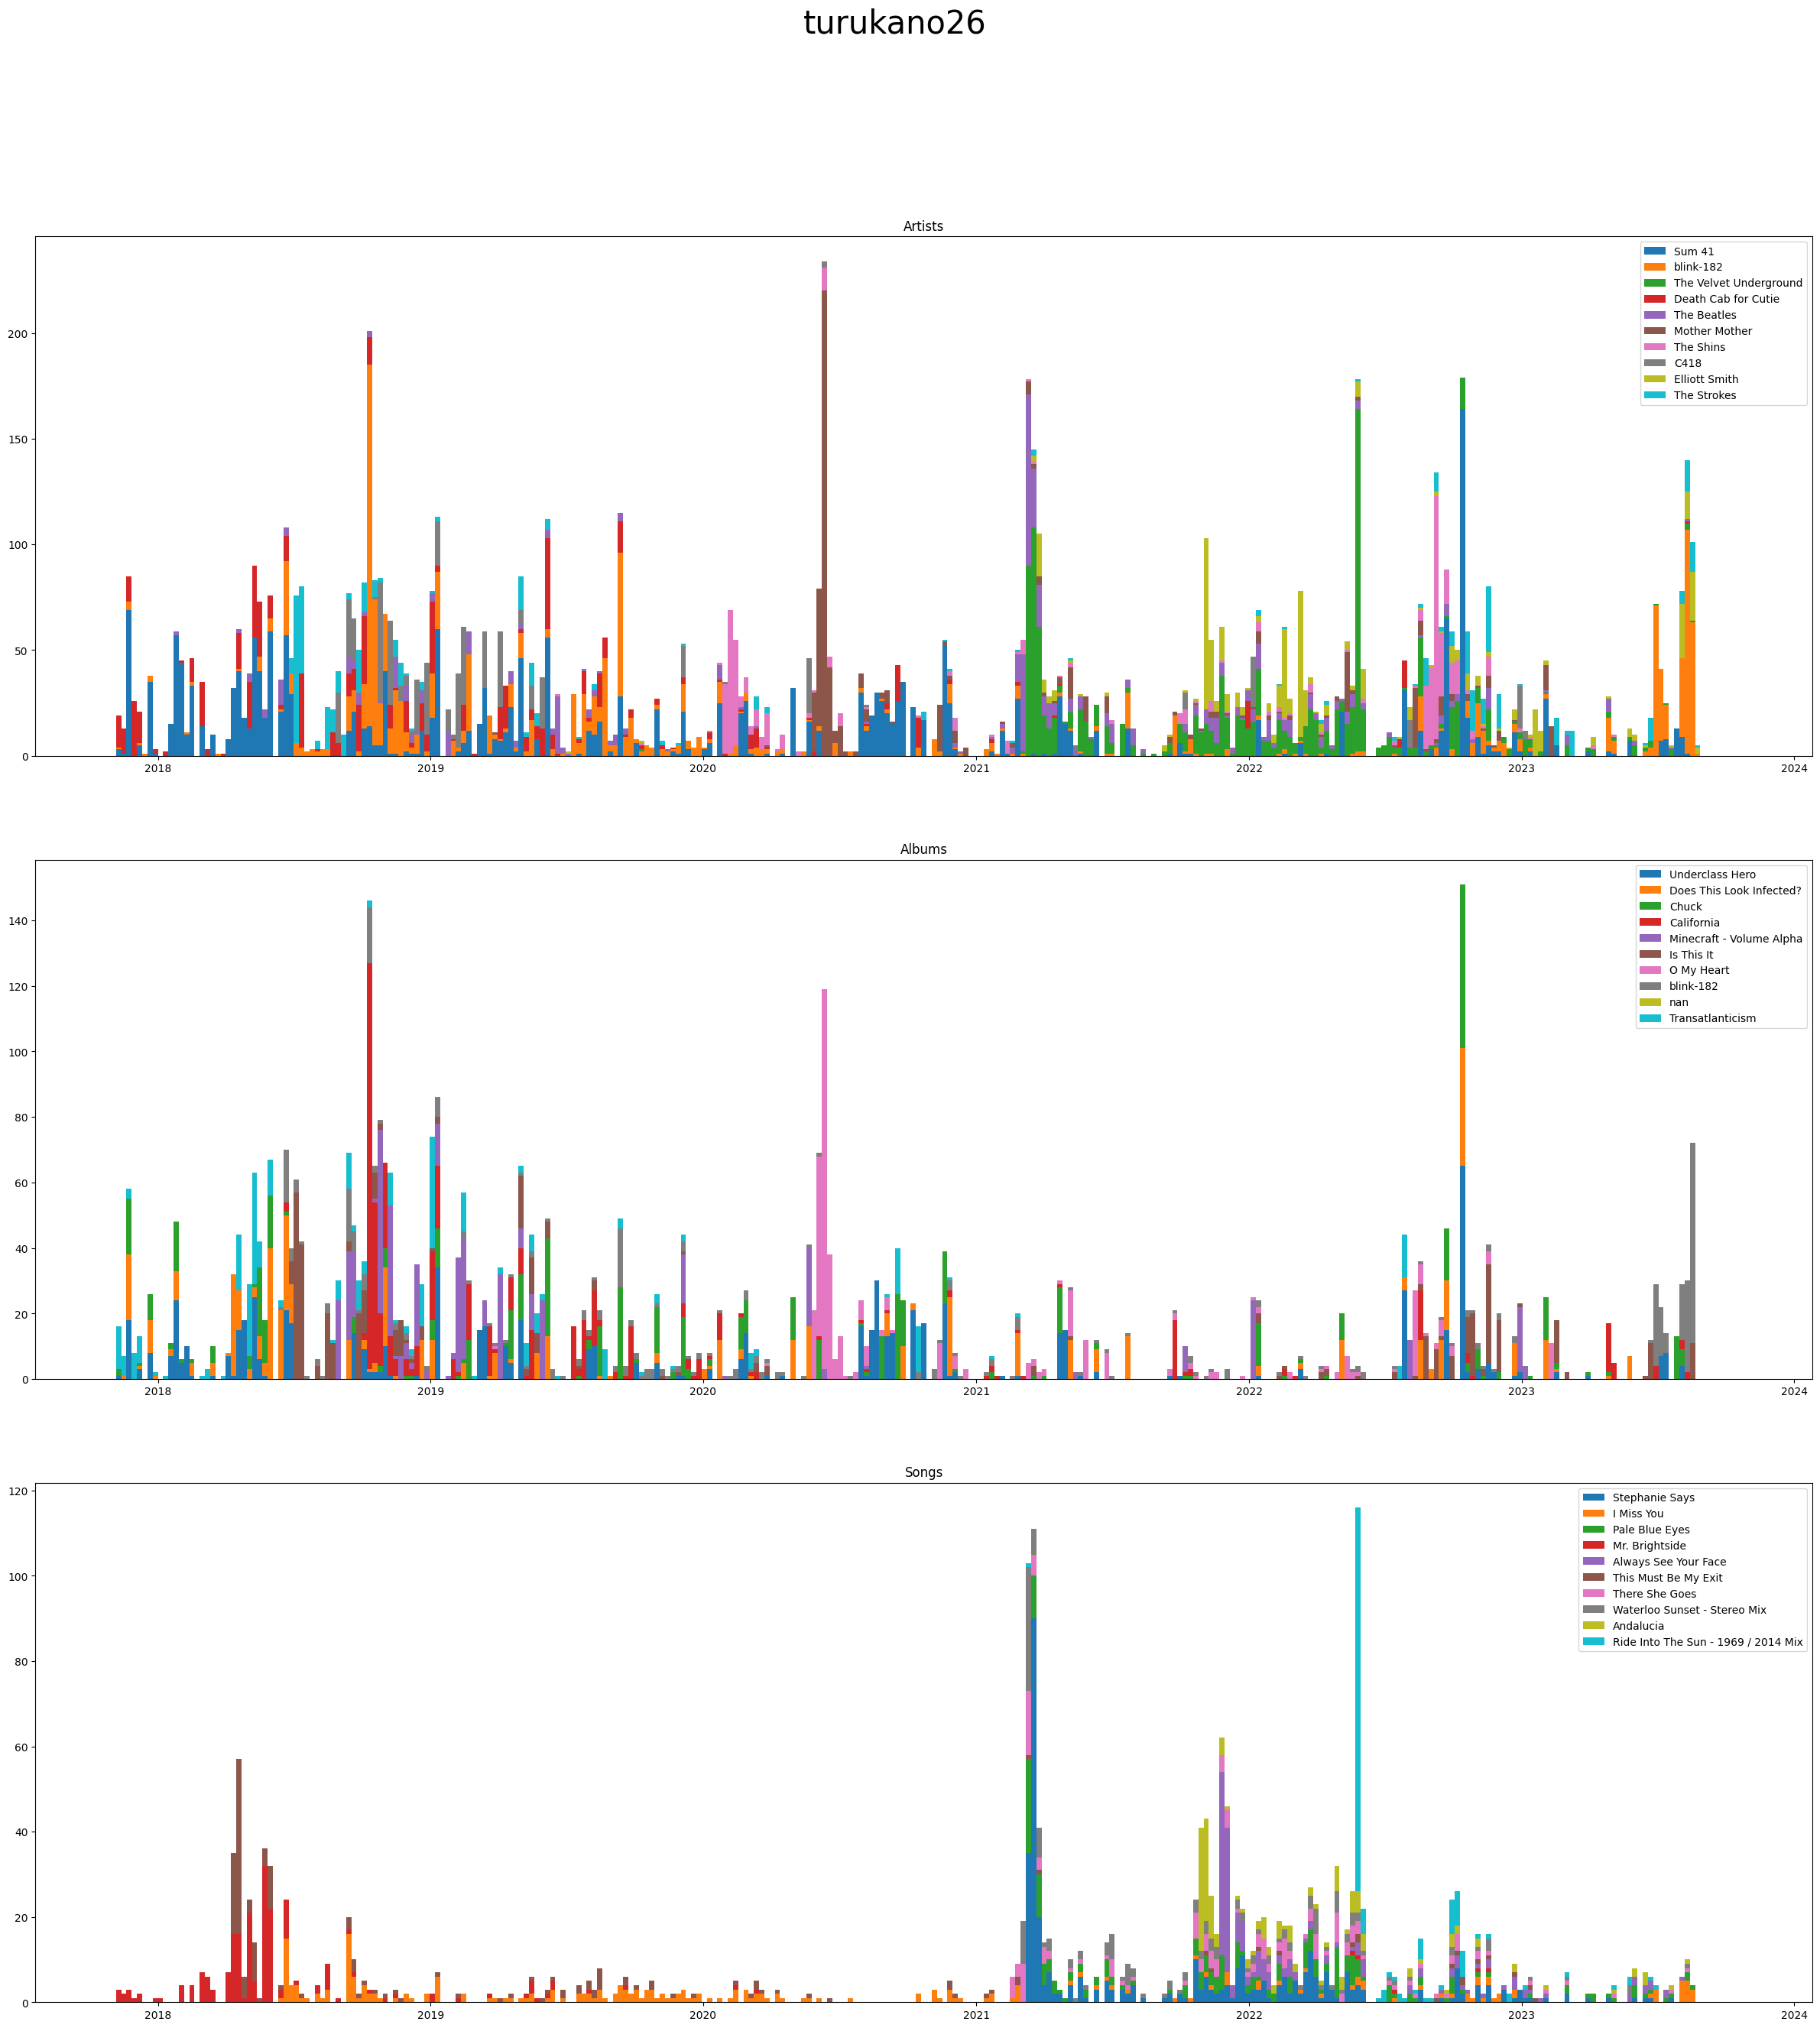

In [ ]:
plot_user(10, 'turukano26')


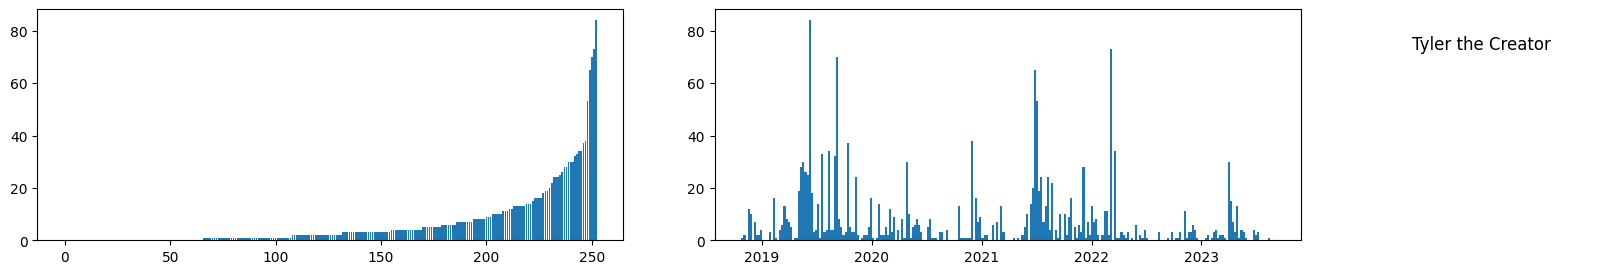

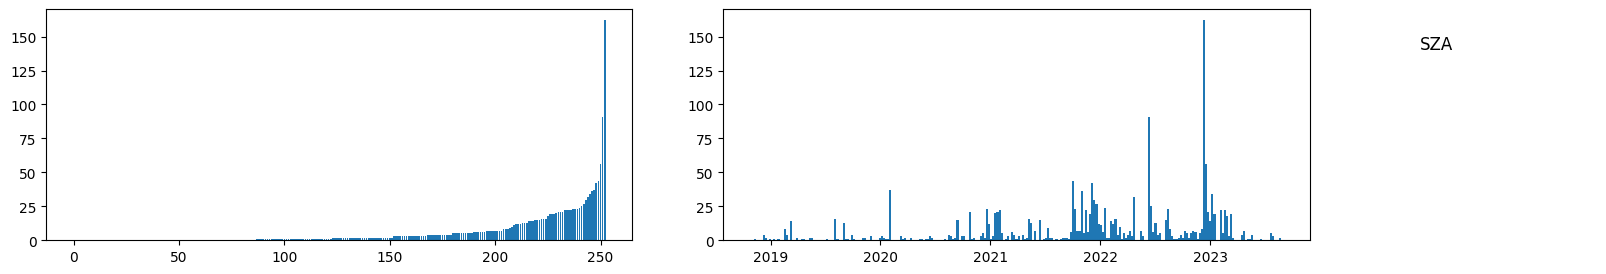

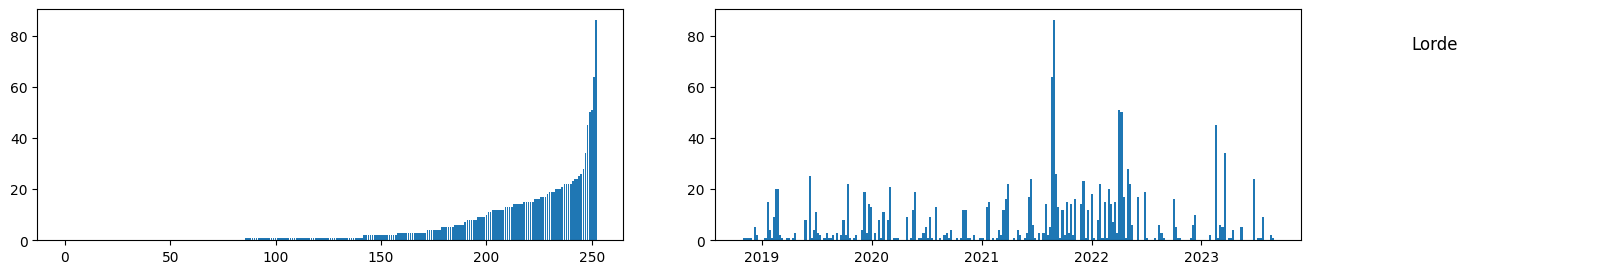

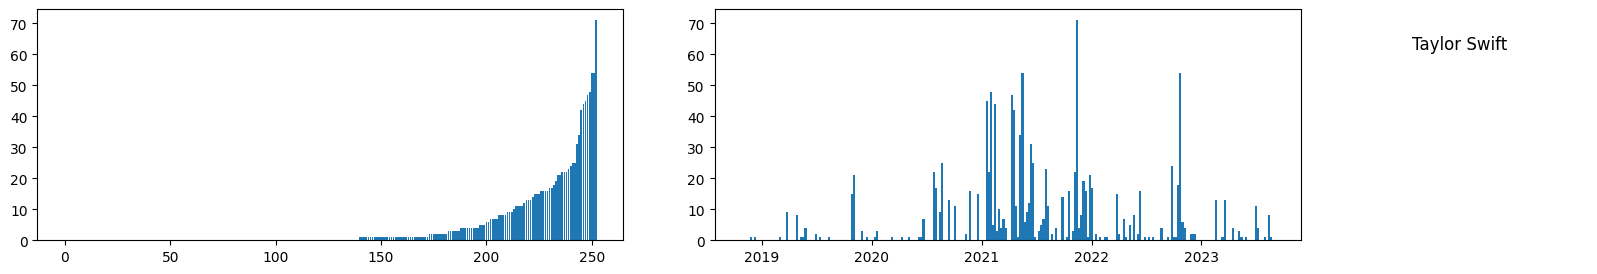

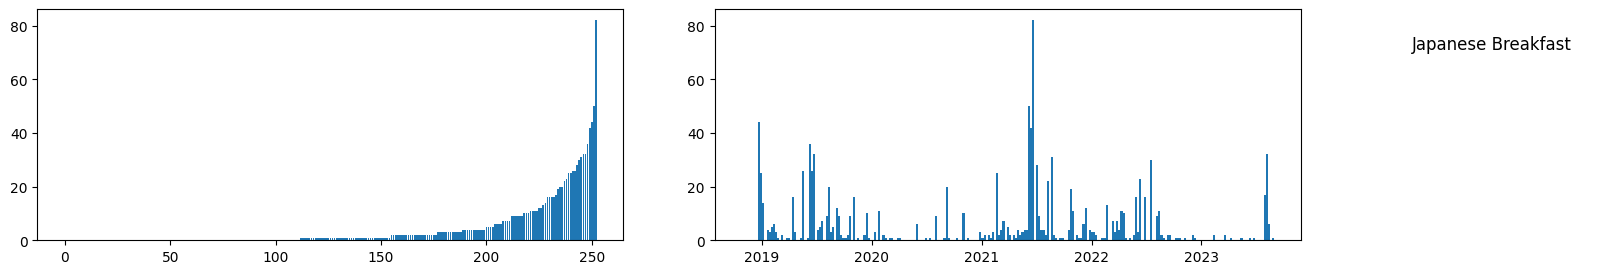

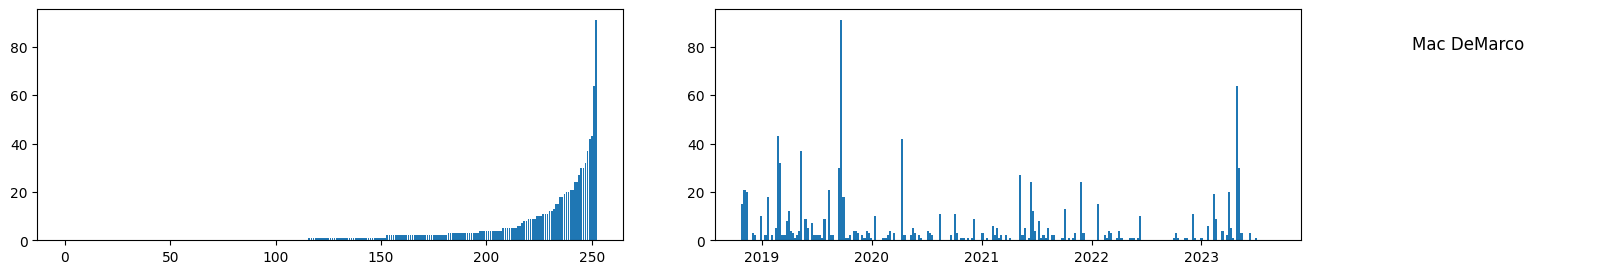

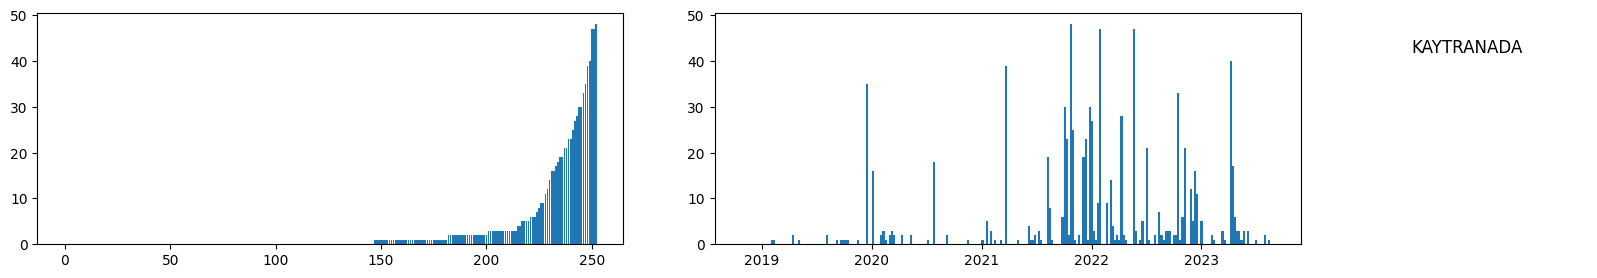

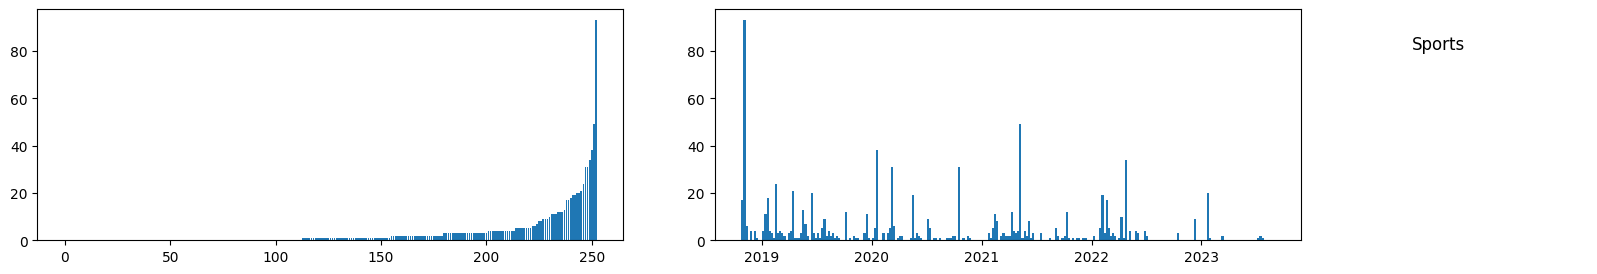

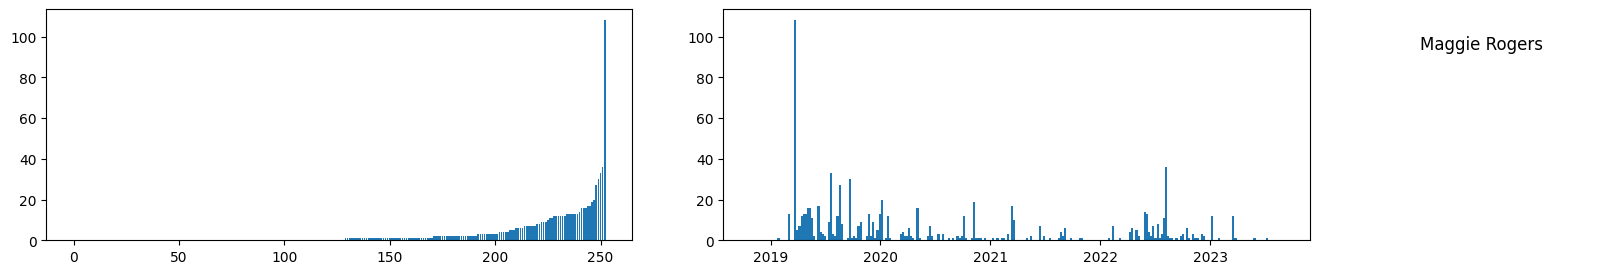

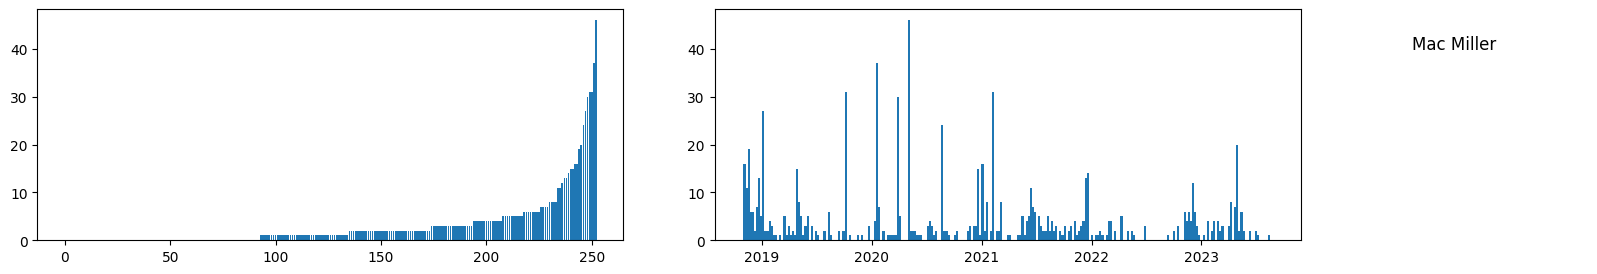

In [ ]:
plot_top_n_distributions(10, "dinasaur1", 0)

In [ ]:
def plot_user2(top_n : int, username : str):

    try:
        data = pd.read_csv('drive/MyDrive/data/' + username + '.csv', header=None)
    except:
        print("No file found for user " + username)
        return
    a = data.to_numpy()

    plt.rcParams["figure.figsize"] = (15,4)
    titles = ["Artists", "Albums", "Songs"]
    plt.suptitle(username, fontsize=30)

    weeks = np.arange(pd.to_datetime(a[-1][3]).to_numpy(), pd.Timestamp.now().to_numpy(), np.timedelta64(1, 'M'), dtype='datetime64[M]')


    dates = pd.to_datetime(a[:,3])

    plt.hist(dates, bins=weeks)

    plt.show()

In [ ]:
def plot_top_weekly_artists(top_n : int, username : str):

    try:
        data = pd.read_csv('drive/MyDrive/data/' + username + '.csv', header=None)
    except:
        print("No file found for user " + username)
        return
    a = data.to_numpy()

    plt.rcParams["figure.figsize"] = (15,4)
    titles = ["Artists", "Albums", "Songs"]
    plt.suptitle(username, fontsize=30)

    months = np.arange(pd.to_datetime(a[-1][3]).to_numpy(), pd.Timestamp.now().to_numpy(), np.timedelta64(1, 'M'), dtype='datetime64[M]')

    labels = []
    heights = []
    date_array = np.array(pd.to_datetime(a[:,3]), dtype='datetime64[M]')
    for month in months:
        b = a[date_array == month]
        names, counts = np.unique(b[:,0].astype(str), return_counts=True)
        top_names = np.flip(names[np.argsort(counts)])[0:top_n]
        top_artist_counts = np.flip(counts[np.argsort(counts)])[0:top_n]
        labels.append(top_names[0])
        heights.append(top_artist_counts[0])

    colors = []
    color_dict = {}
    for i, label in enumerate(labels):
        if label in color_dict:
            colors.append(color_dict[label])
        else:
            color_dict[label] = tableau20[i%20]               #"#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
            colors.append(color_dict[label])


    plt.bar(range(len(heights)), heights, label=labels, color=colors)
    print(labels)
    print(color_dict.values(), color_dict.keys())
    plt.legend(color_dict.keys())

    plt.show()

In [ ]:
def plot_user(top_n : int, username : str):

    try:
        data = pd.read_csv('drive/MyDrive/data/' + username + '.csv', header=None)
    except:
        print("No file found for user " + username)
        return
    a = data.to_numpy()

    plt.rcParams["figure.figsize"] = (30,30)
    fig, ax = plt.subplots(3)
    titles = ["Artists", "Albums", "Songs"]
    fig.suptitle(username, fontsize=30)

    for column_num in range(3):

        names, counts = np.unique(a[:,column_num].astype(str), return_counts=True)
        top_names = np.flip(names[np.argsort(counts)])[0:top_n]
        top_artist_counts = np.flip(counts[np.argsort(counts)])[0:top_n]
        weeks = np.arange(pd.to_datetime(a[-1][3]).to_numpy(), pd.Timestamp.now().to_numpy(), np.timedelta64(1, 'W'), dtype='datetime64[D]')

        d = []
        for artist in top_names:

            matching_entries = a[a[:,column_num] == artist]
            dates = pd.to_datetime(matching_entries[:,3])
            d.append(dates)

        ax[column_num].hist(d, bins=weeks, histtype='barstacked', color=tableau20[0:top_n])
        ax[column_num].set_title(titles[column_num])
        ax[column_num].legend(top_names)

    plt.show()

In [ ]:
data = pd.read_csv('drive/MyDrive/data/' + 'turukano26' + '.csv', header=None)
a = data.to_numpy()

#a[a[:,3] == '2020-11']

np.array(pd.to_datetime(a[:,3]), dtype='datetime64[M]')

array(['2023-08', '2023-08', '2023-08', ..., '2017-11', '2017-11',
       '2017-11'], dtype='datetime64[M]')

['Billie Eilish', 'The Walters', 'Sum 41', 'Sum 41', 'The Killers', 'Sum 41', 'Sum 41', 'Sum 41', 'The Strokes', 'Galileo Galilei', 'Hozier', 'blink-182', 'blink-182', 'C418', 'Sum 41', 'C418', 'Sum 41', 'Cavetown', 'Sum 41', 'Japanese Breakfast', 'blink-182', 'blink-182', 'blink-182', 'blink-182', 'Cage the Elephant', 'Cage the Elephant', 'Ra Ra Riot', 'The Shins', 'Cage the Elephant', 'SEGA Sound Team', 'Sum 41', 'Mother Mother', 'The Lumineers', 'Sum 41', 'Sum 41', 'Gorillaz', 'Sum 41', 'Stamatis Spanoudakis', 'Terry Bush', 'Sum 41', 'The Velvet Underground', 'Sum 41', 'The Velvet Underground', 'The Velvet Underground', 'The Velvet Underground', 'The Velvet Underground', 'blink-182', 'John Cale', 'Elliott Smith', 'The Velvet Underground', 'The Magnetic Fields', 'Elliott Smith', 'Elliott Smith', 'Paul McCartney', 'The Velvet Underground', 'Pink Floyd', 'Sum 41', 'The Shins', 'The Shins', 'Sum 41', 'The Strokes', 'Gorillaz', 'Corduroy', 'Sum 41', 'Pixies', 'blink-182', 'Corduroy', 'Co

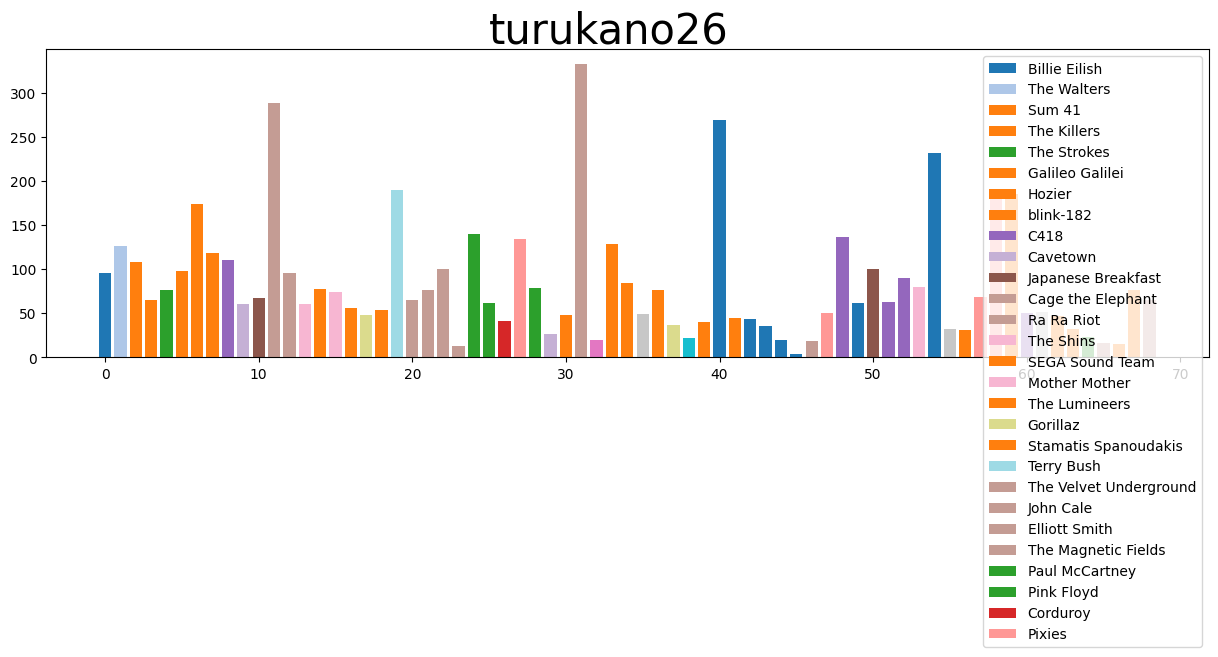

In [ ]:
plot_top_weekly_artists(15, 'turukano26')

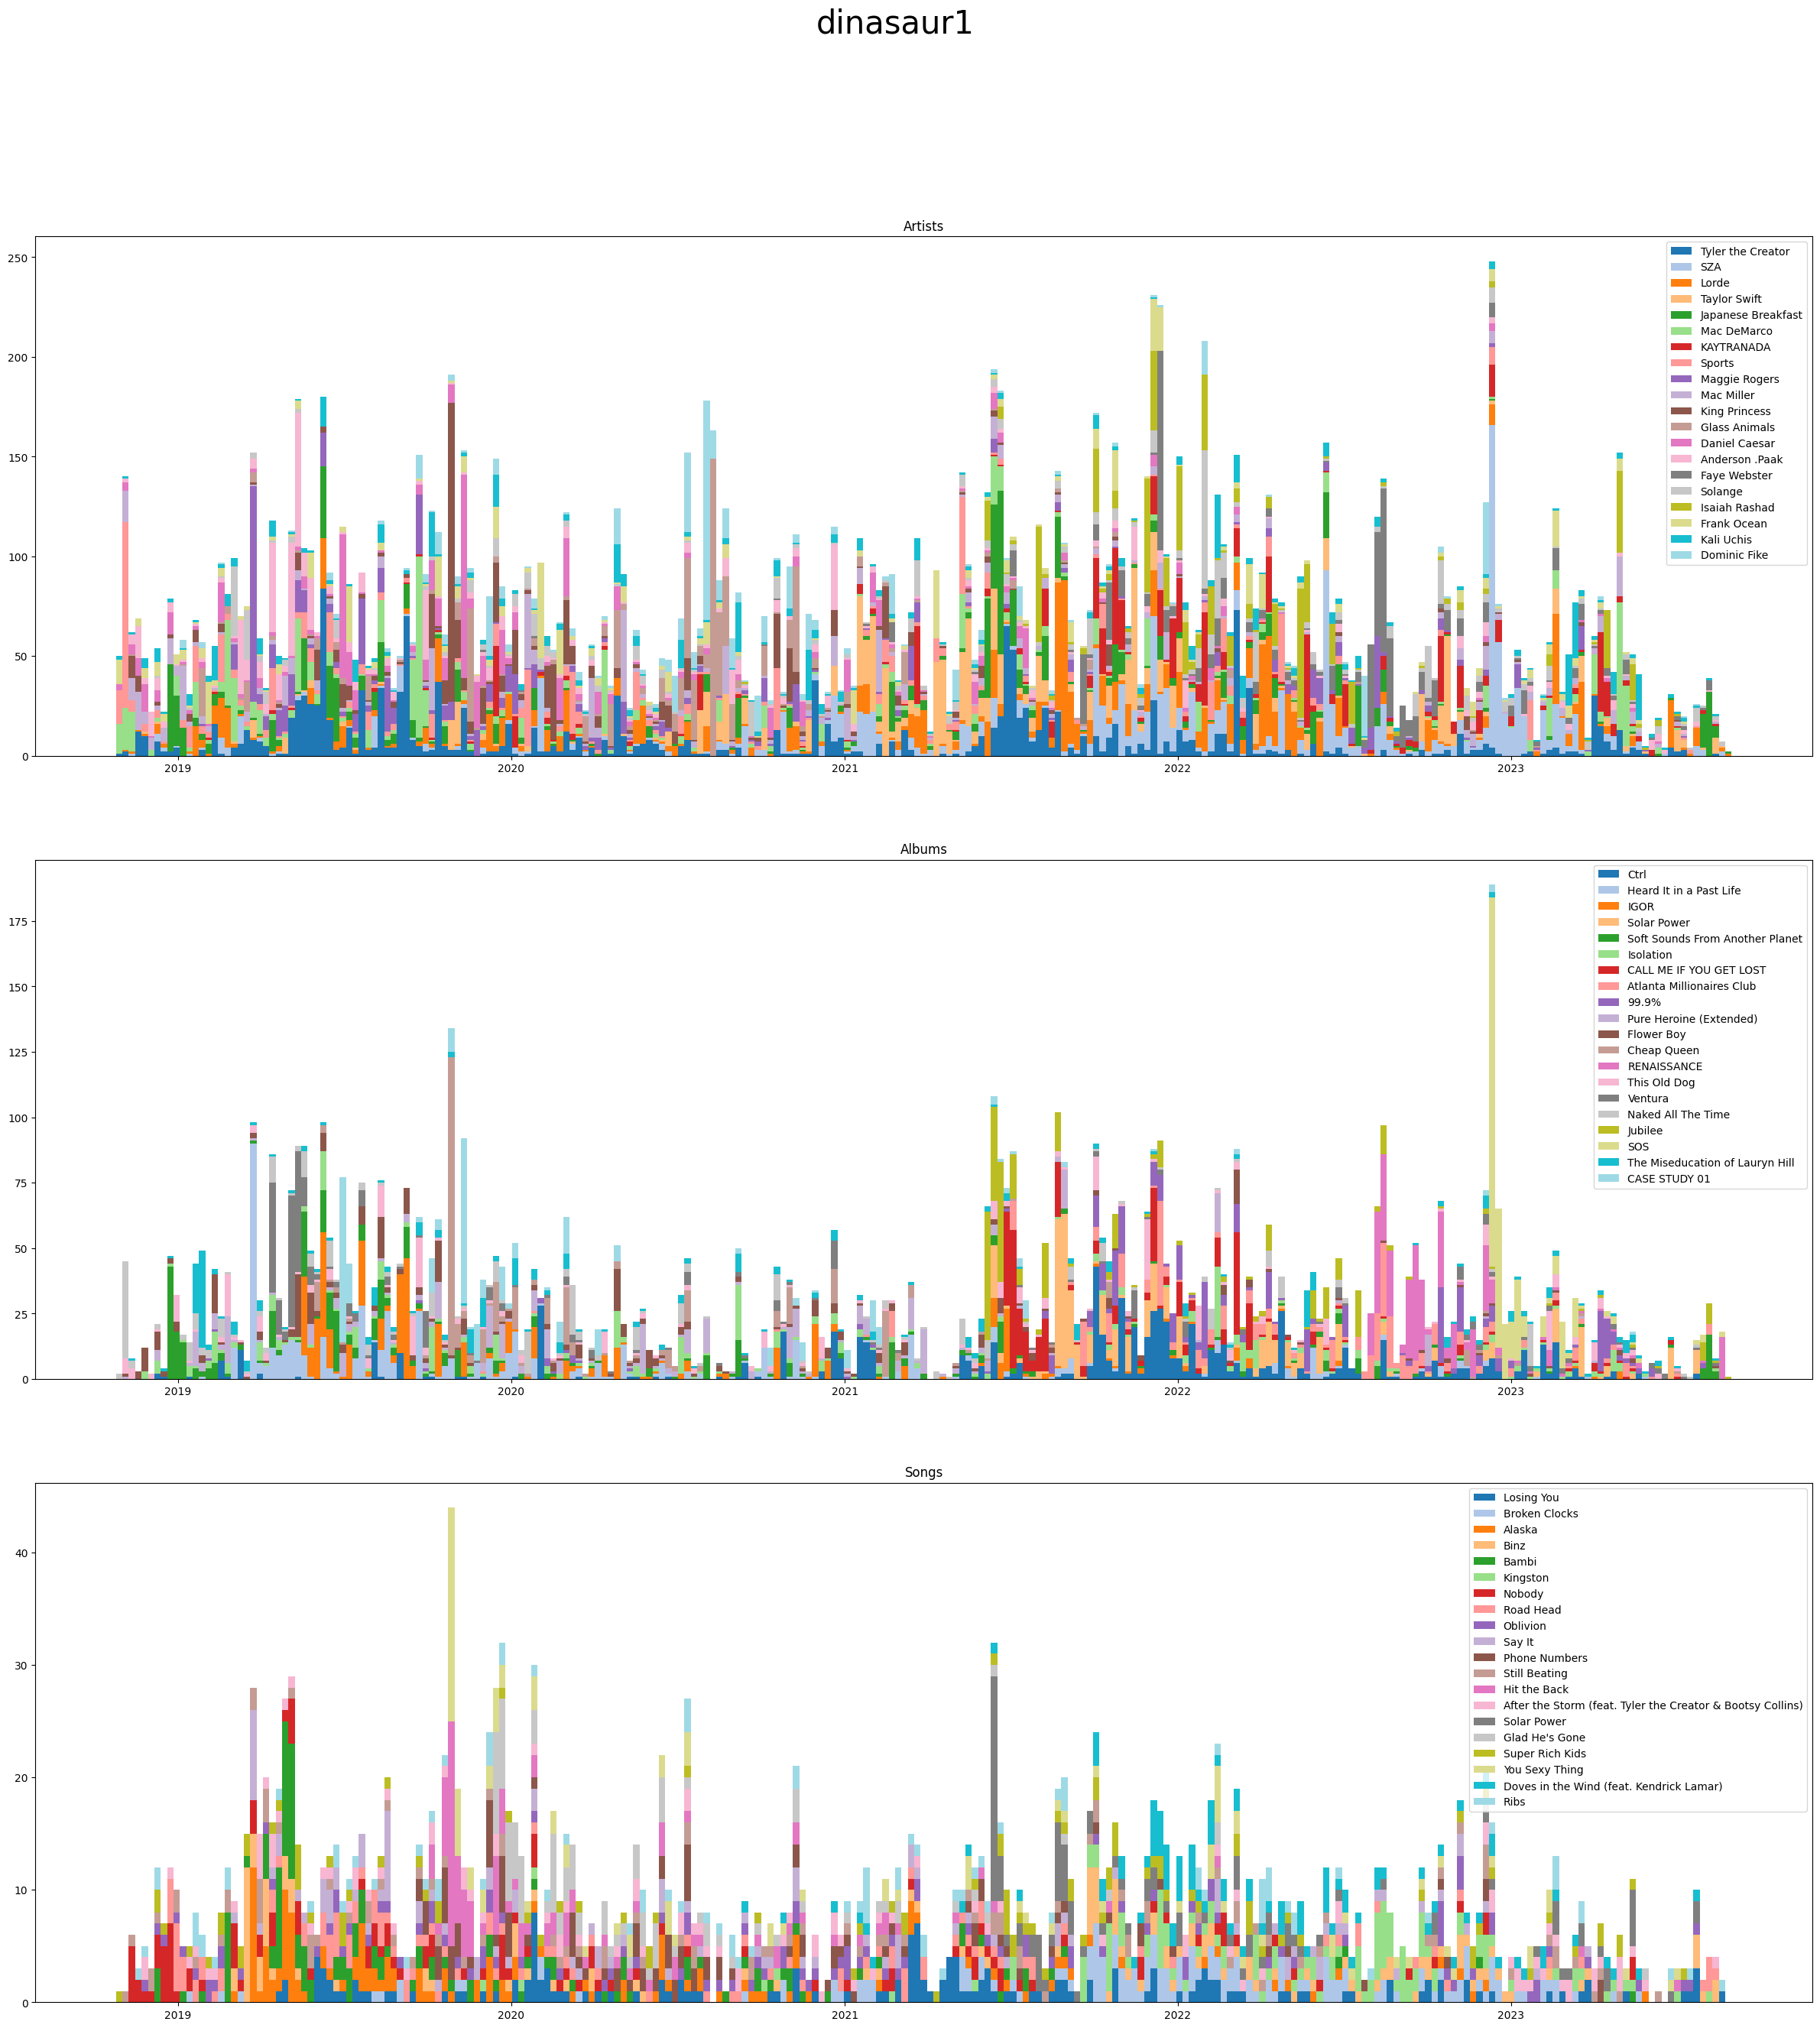

In [ ]:
plot_user(20, "dinasaur1")

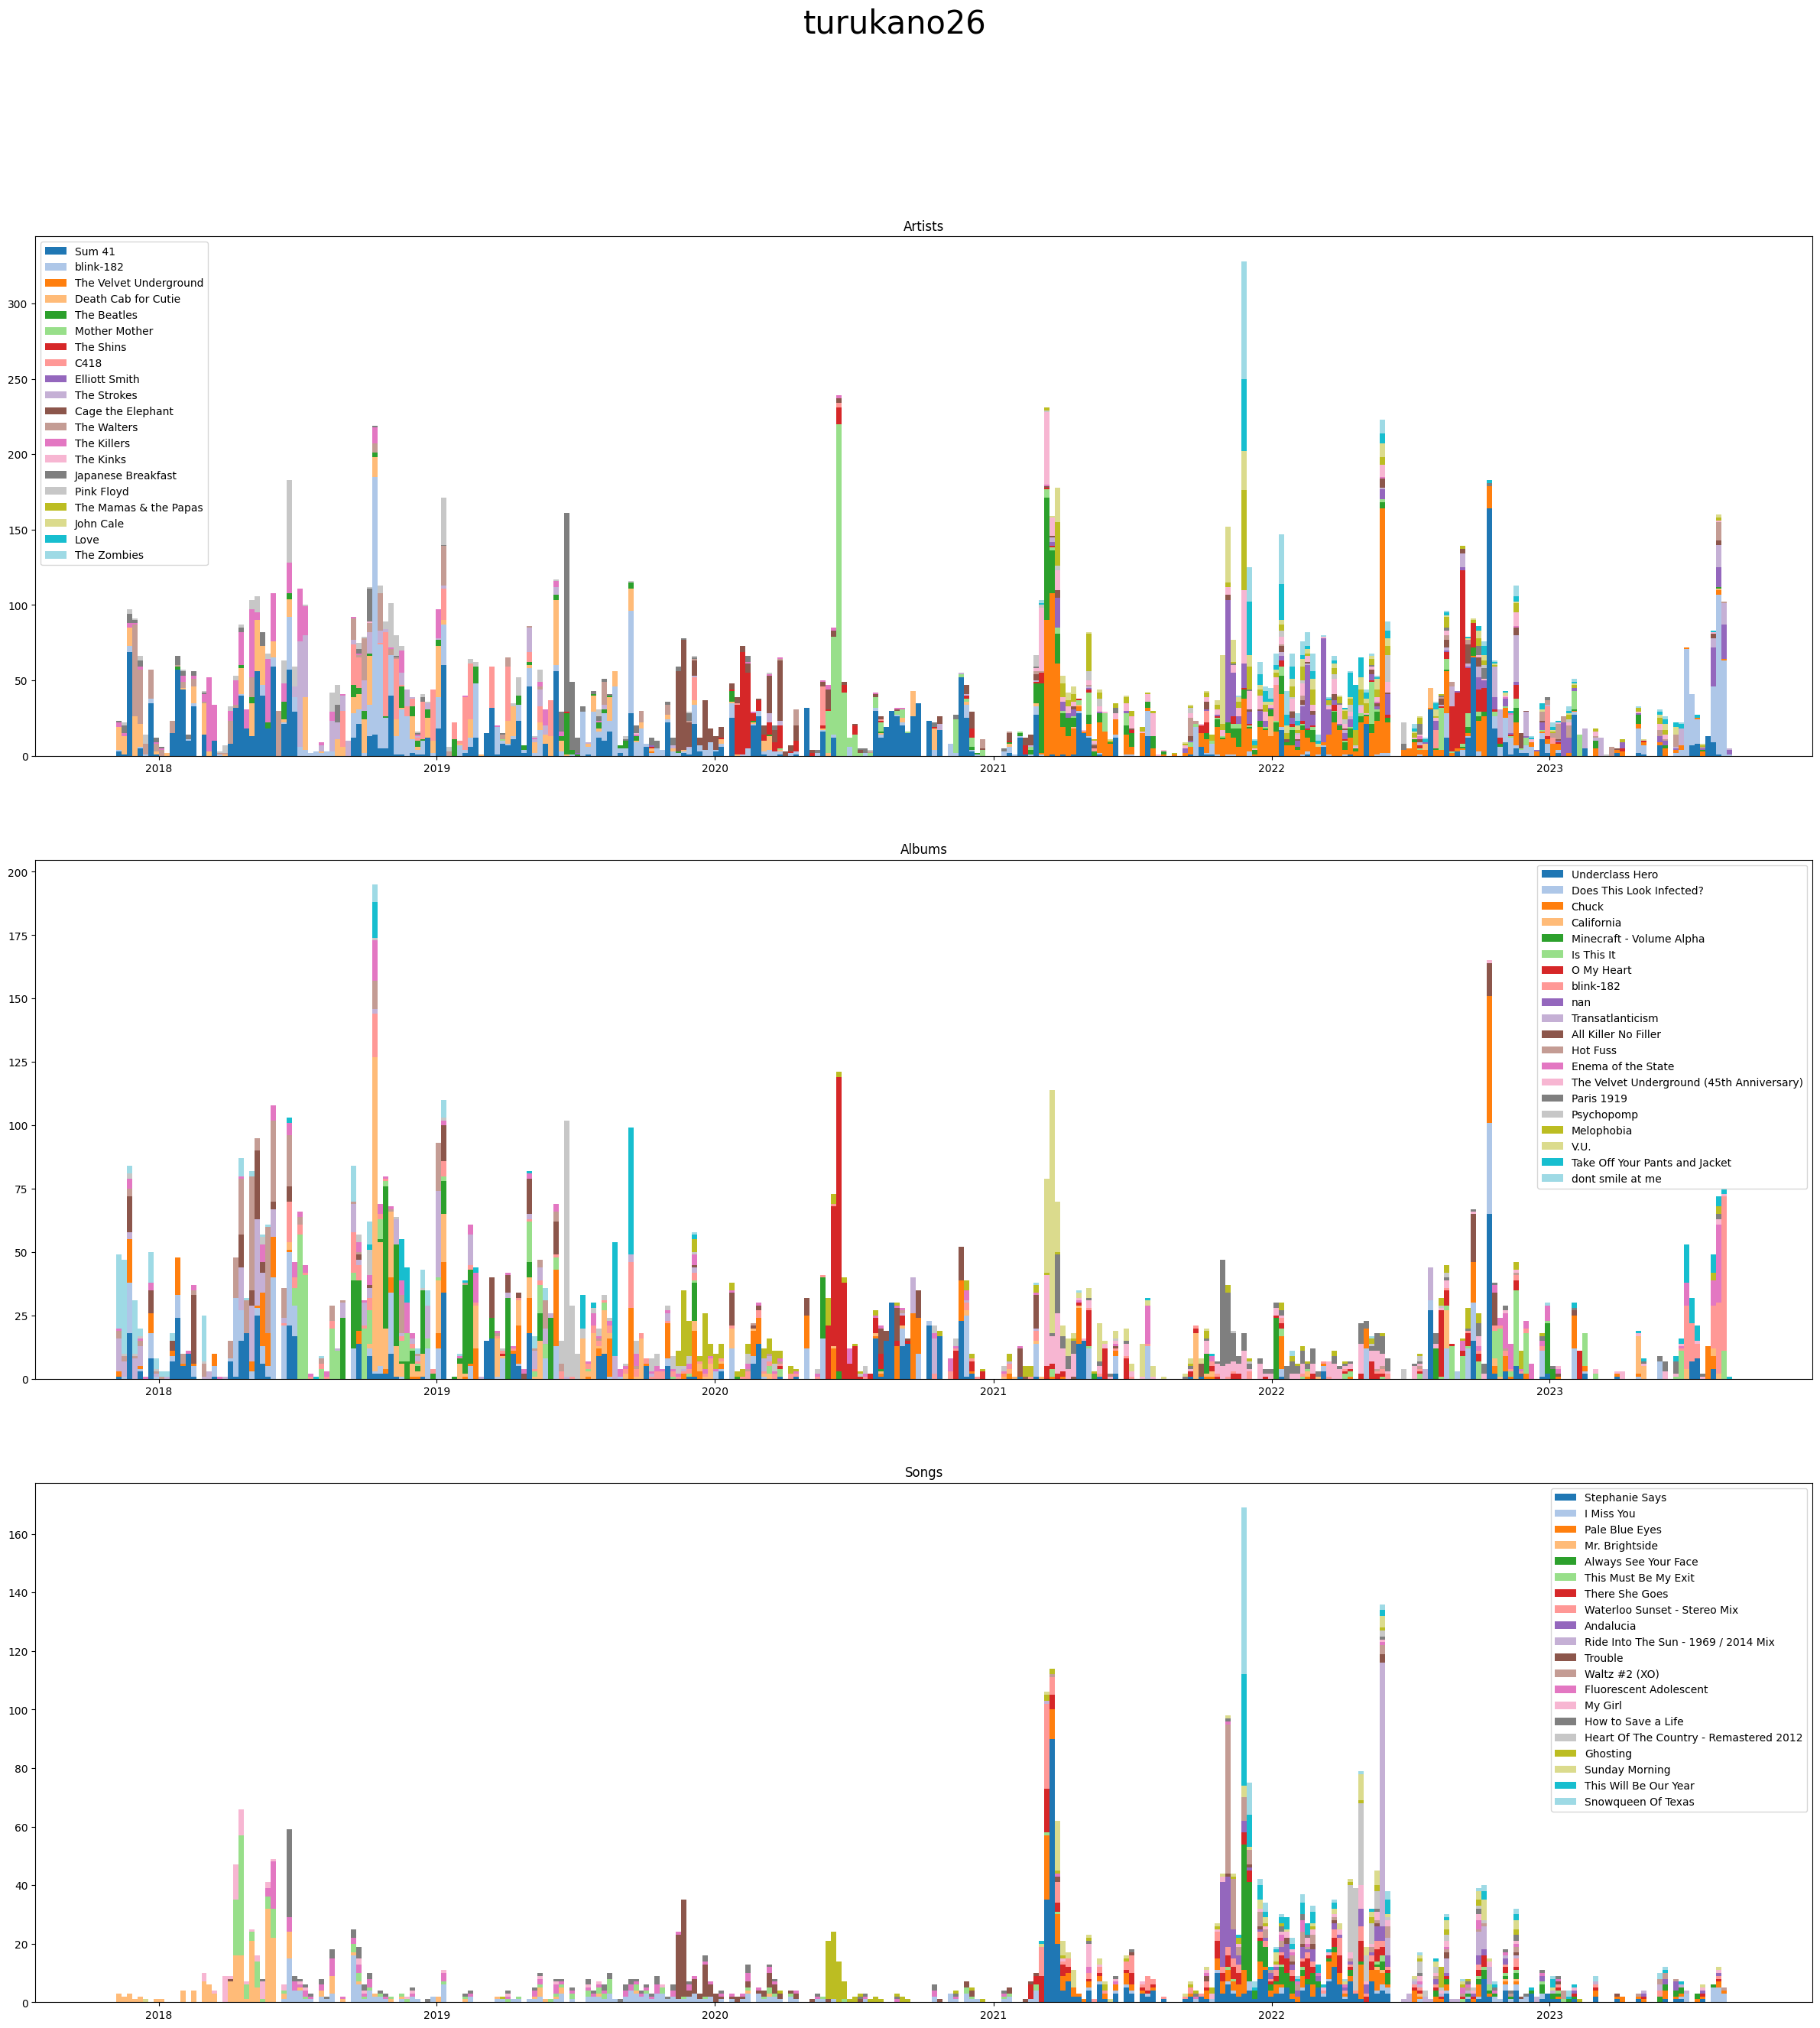

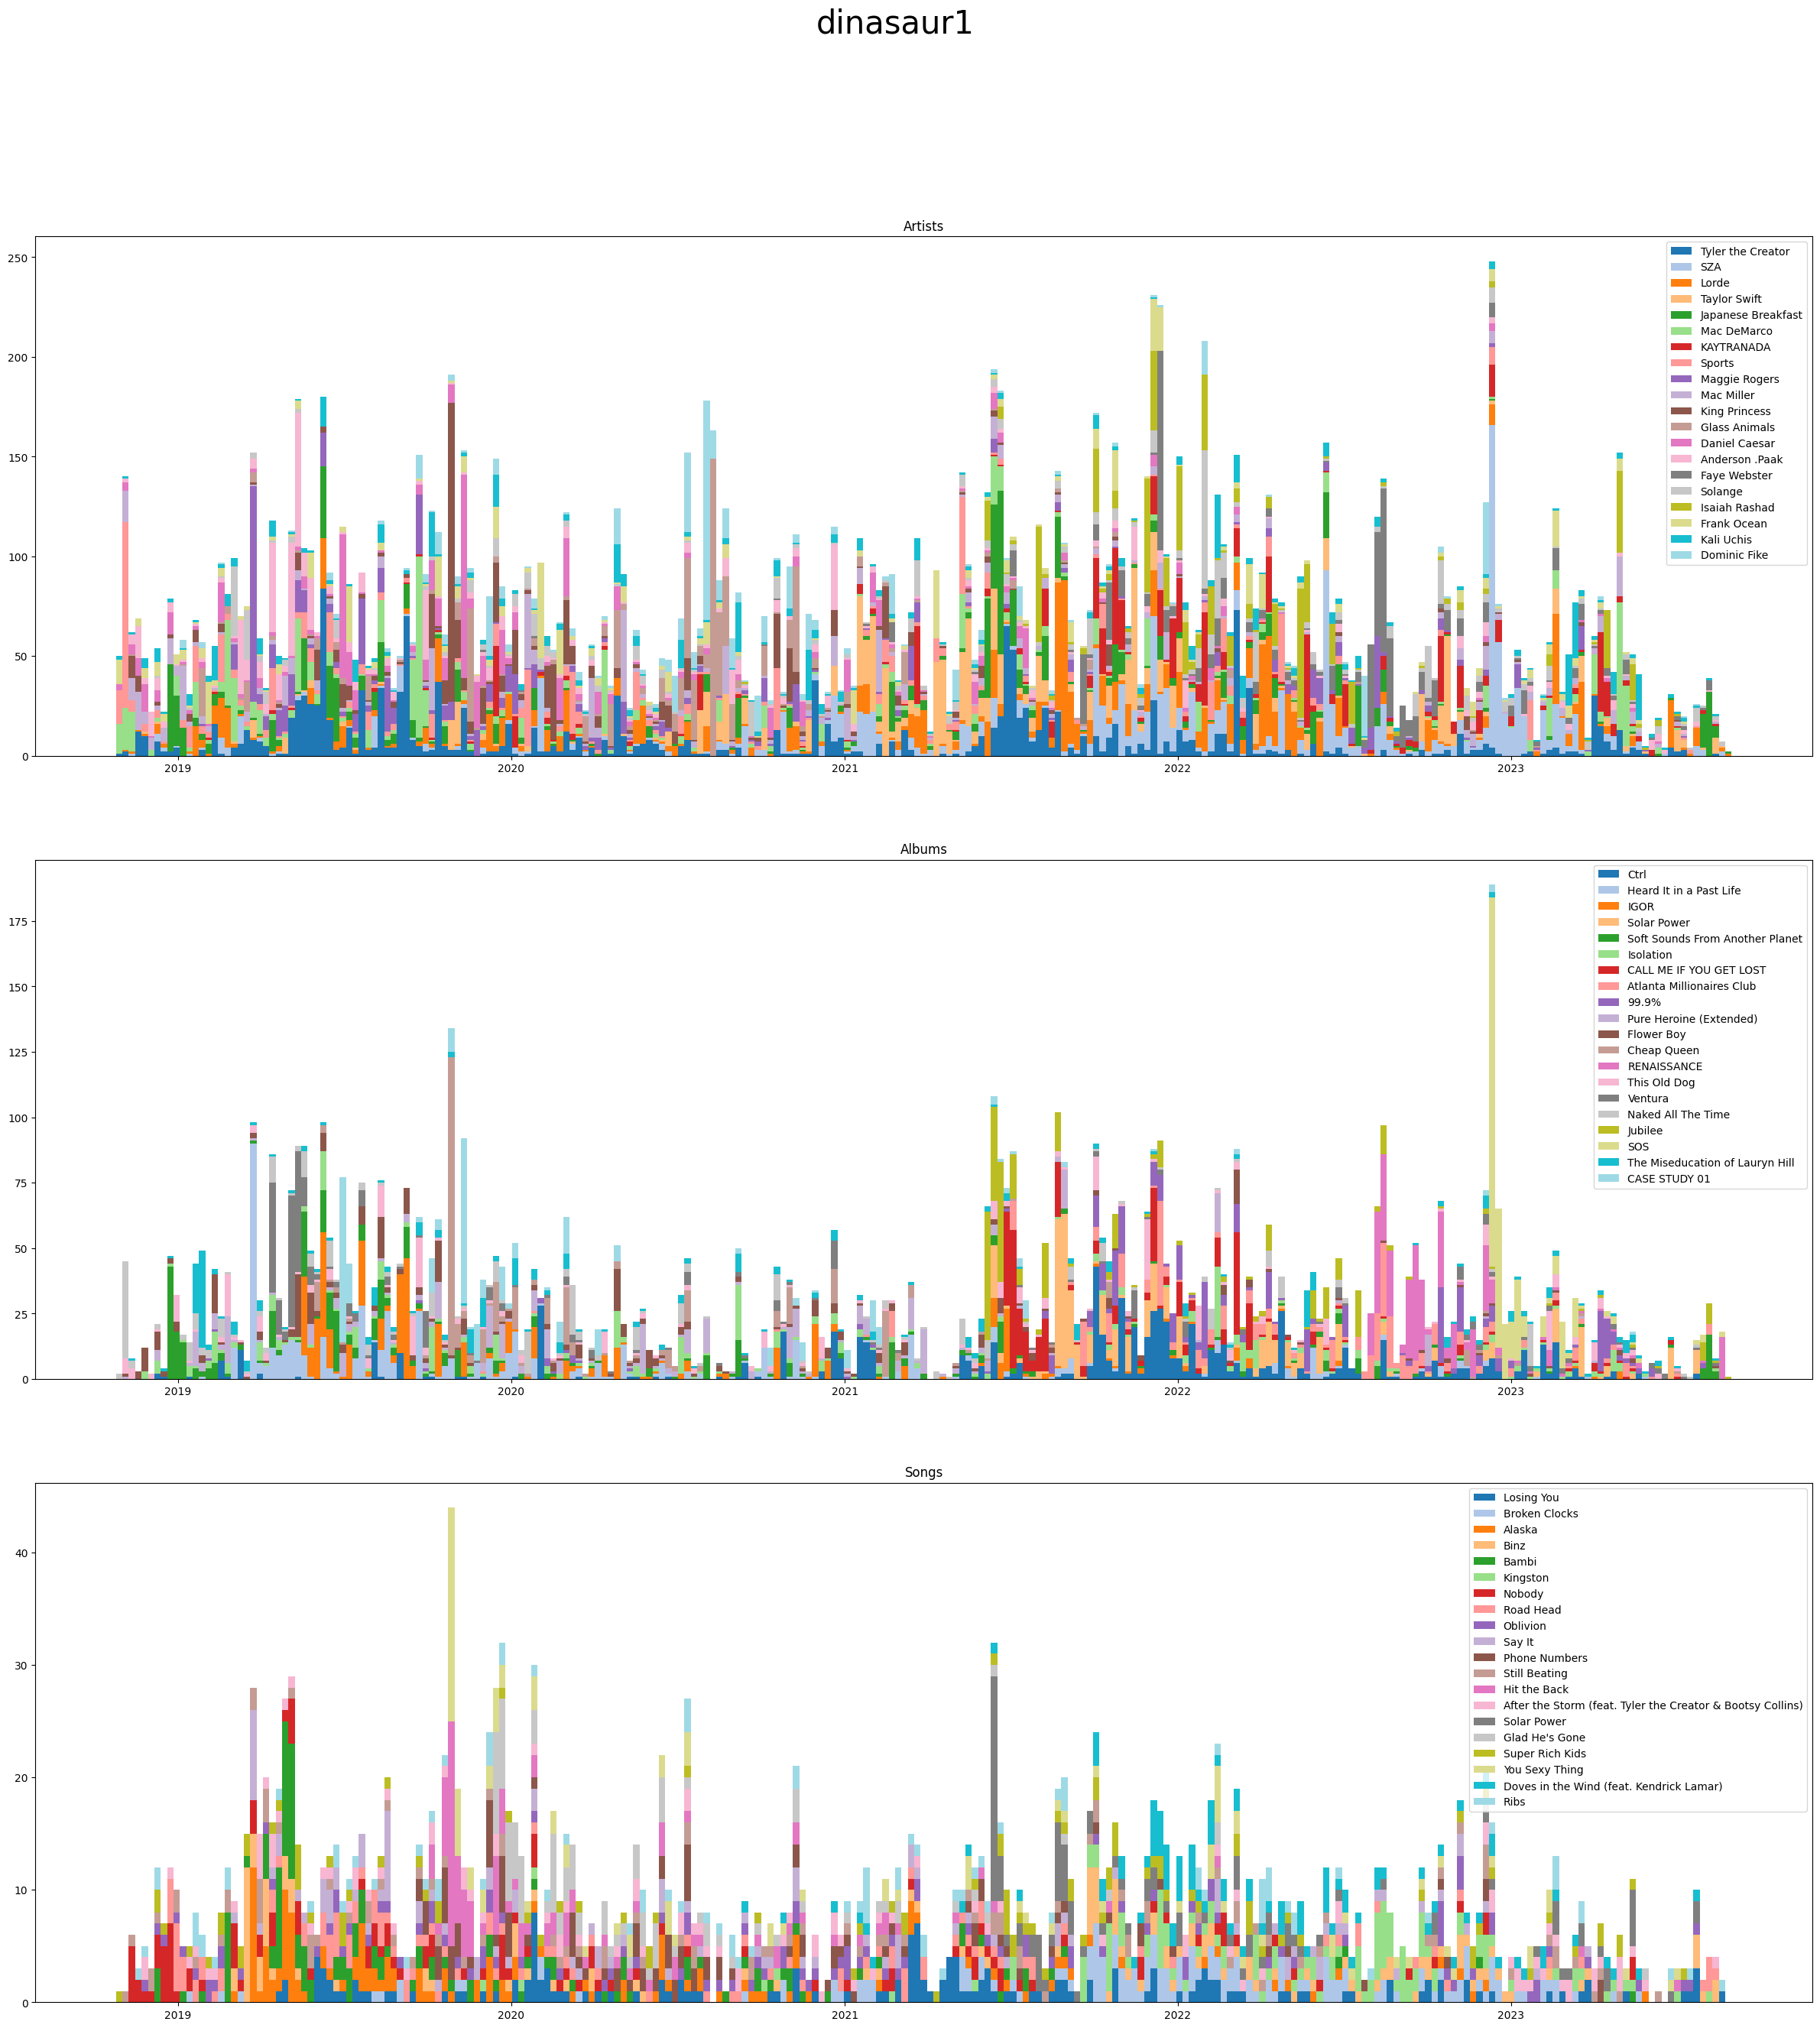

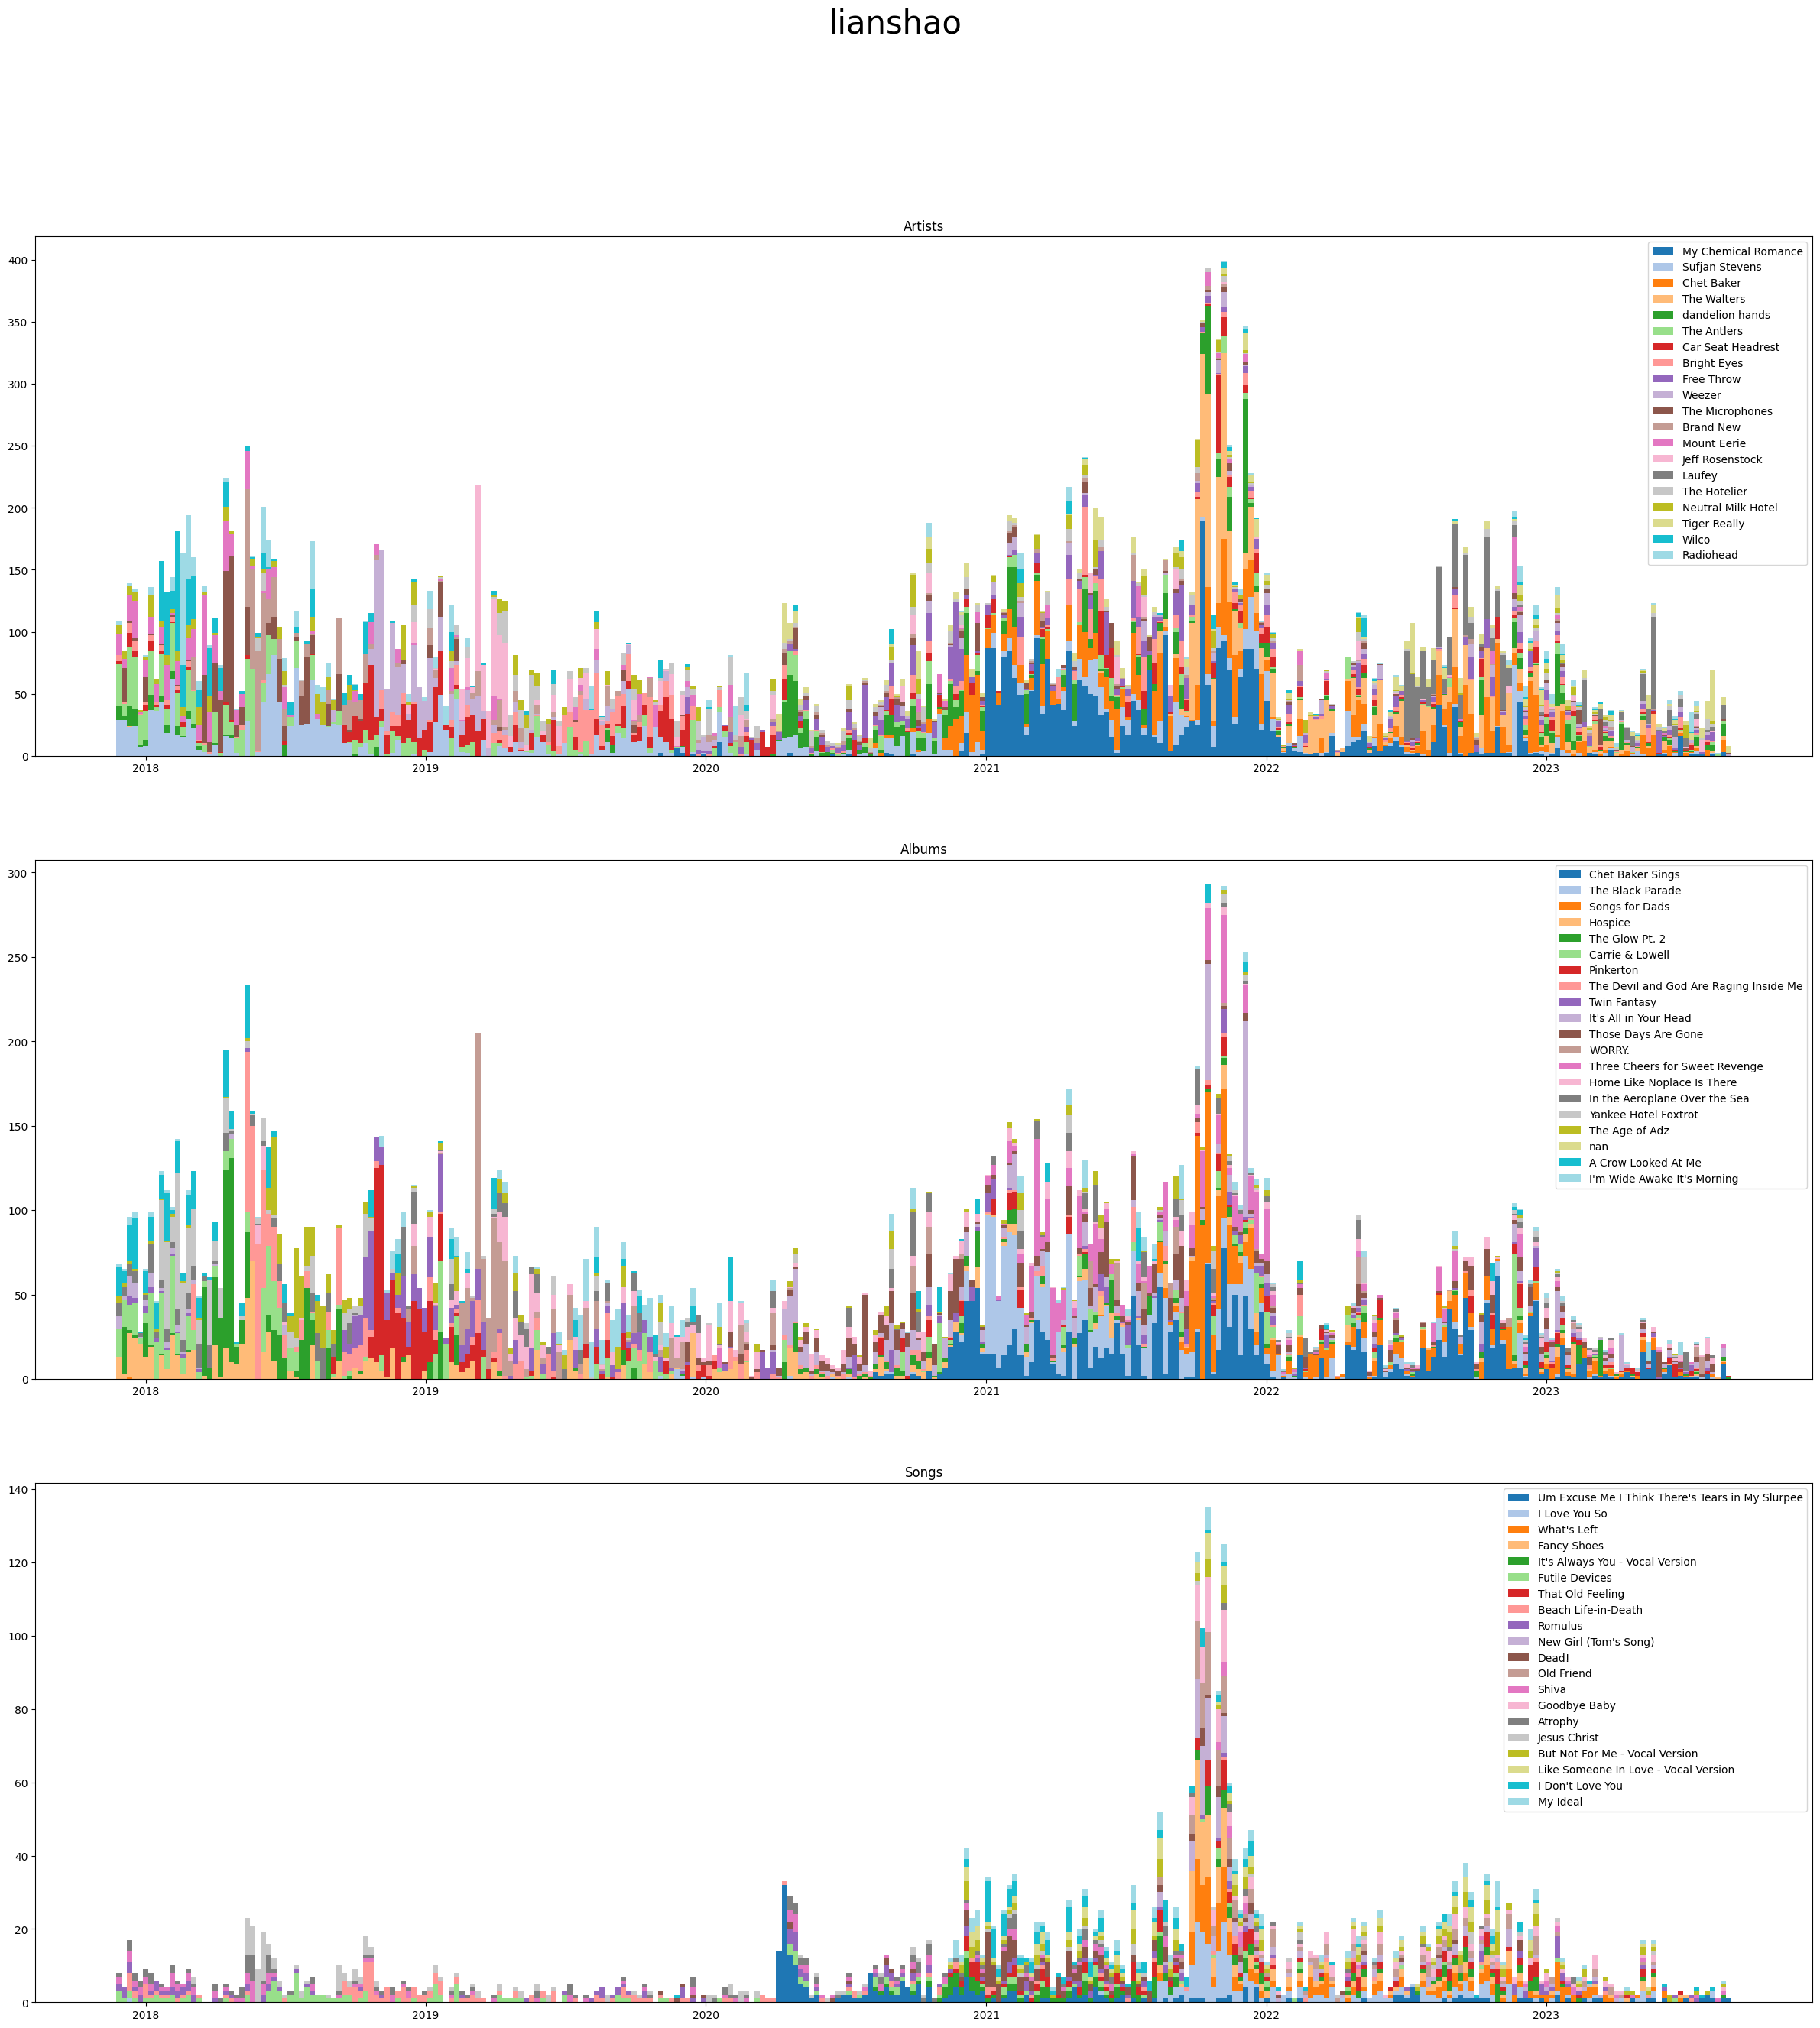

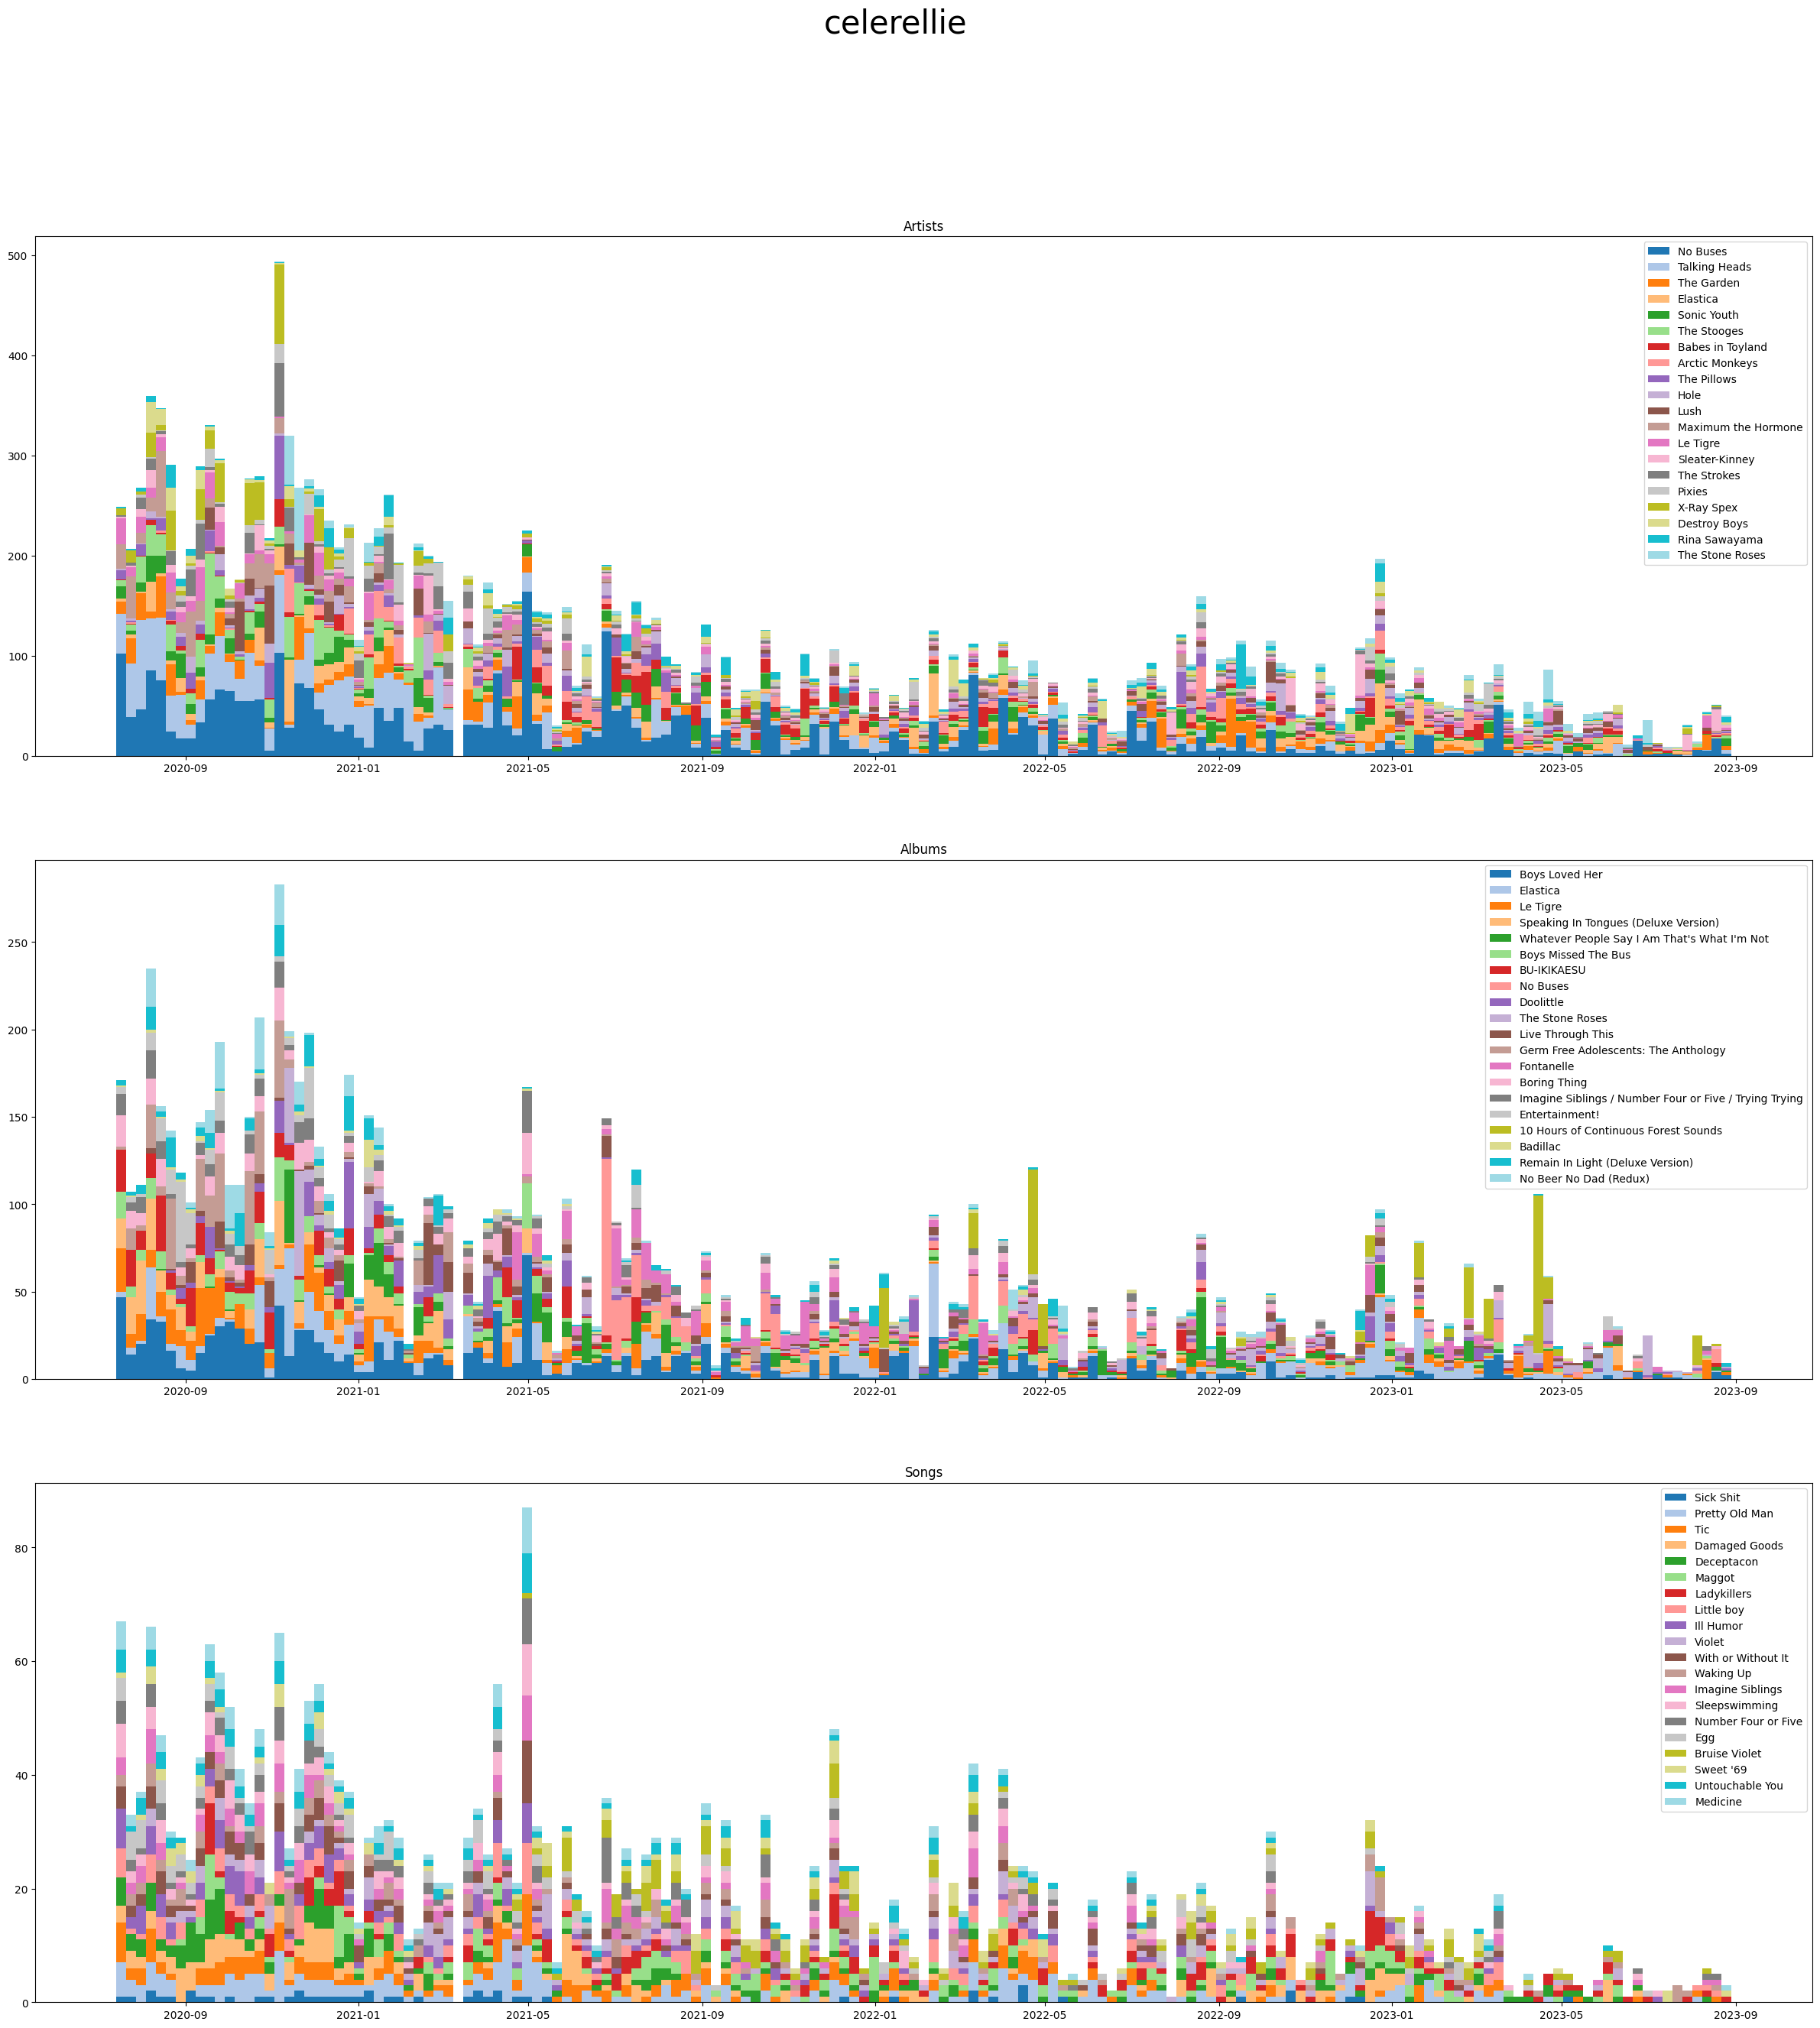

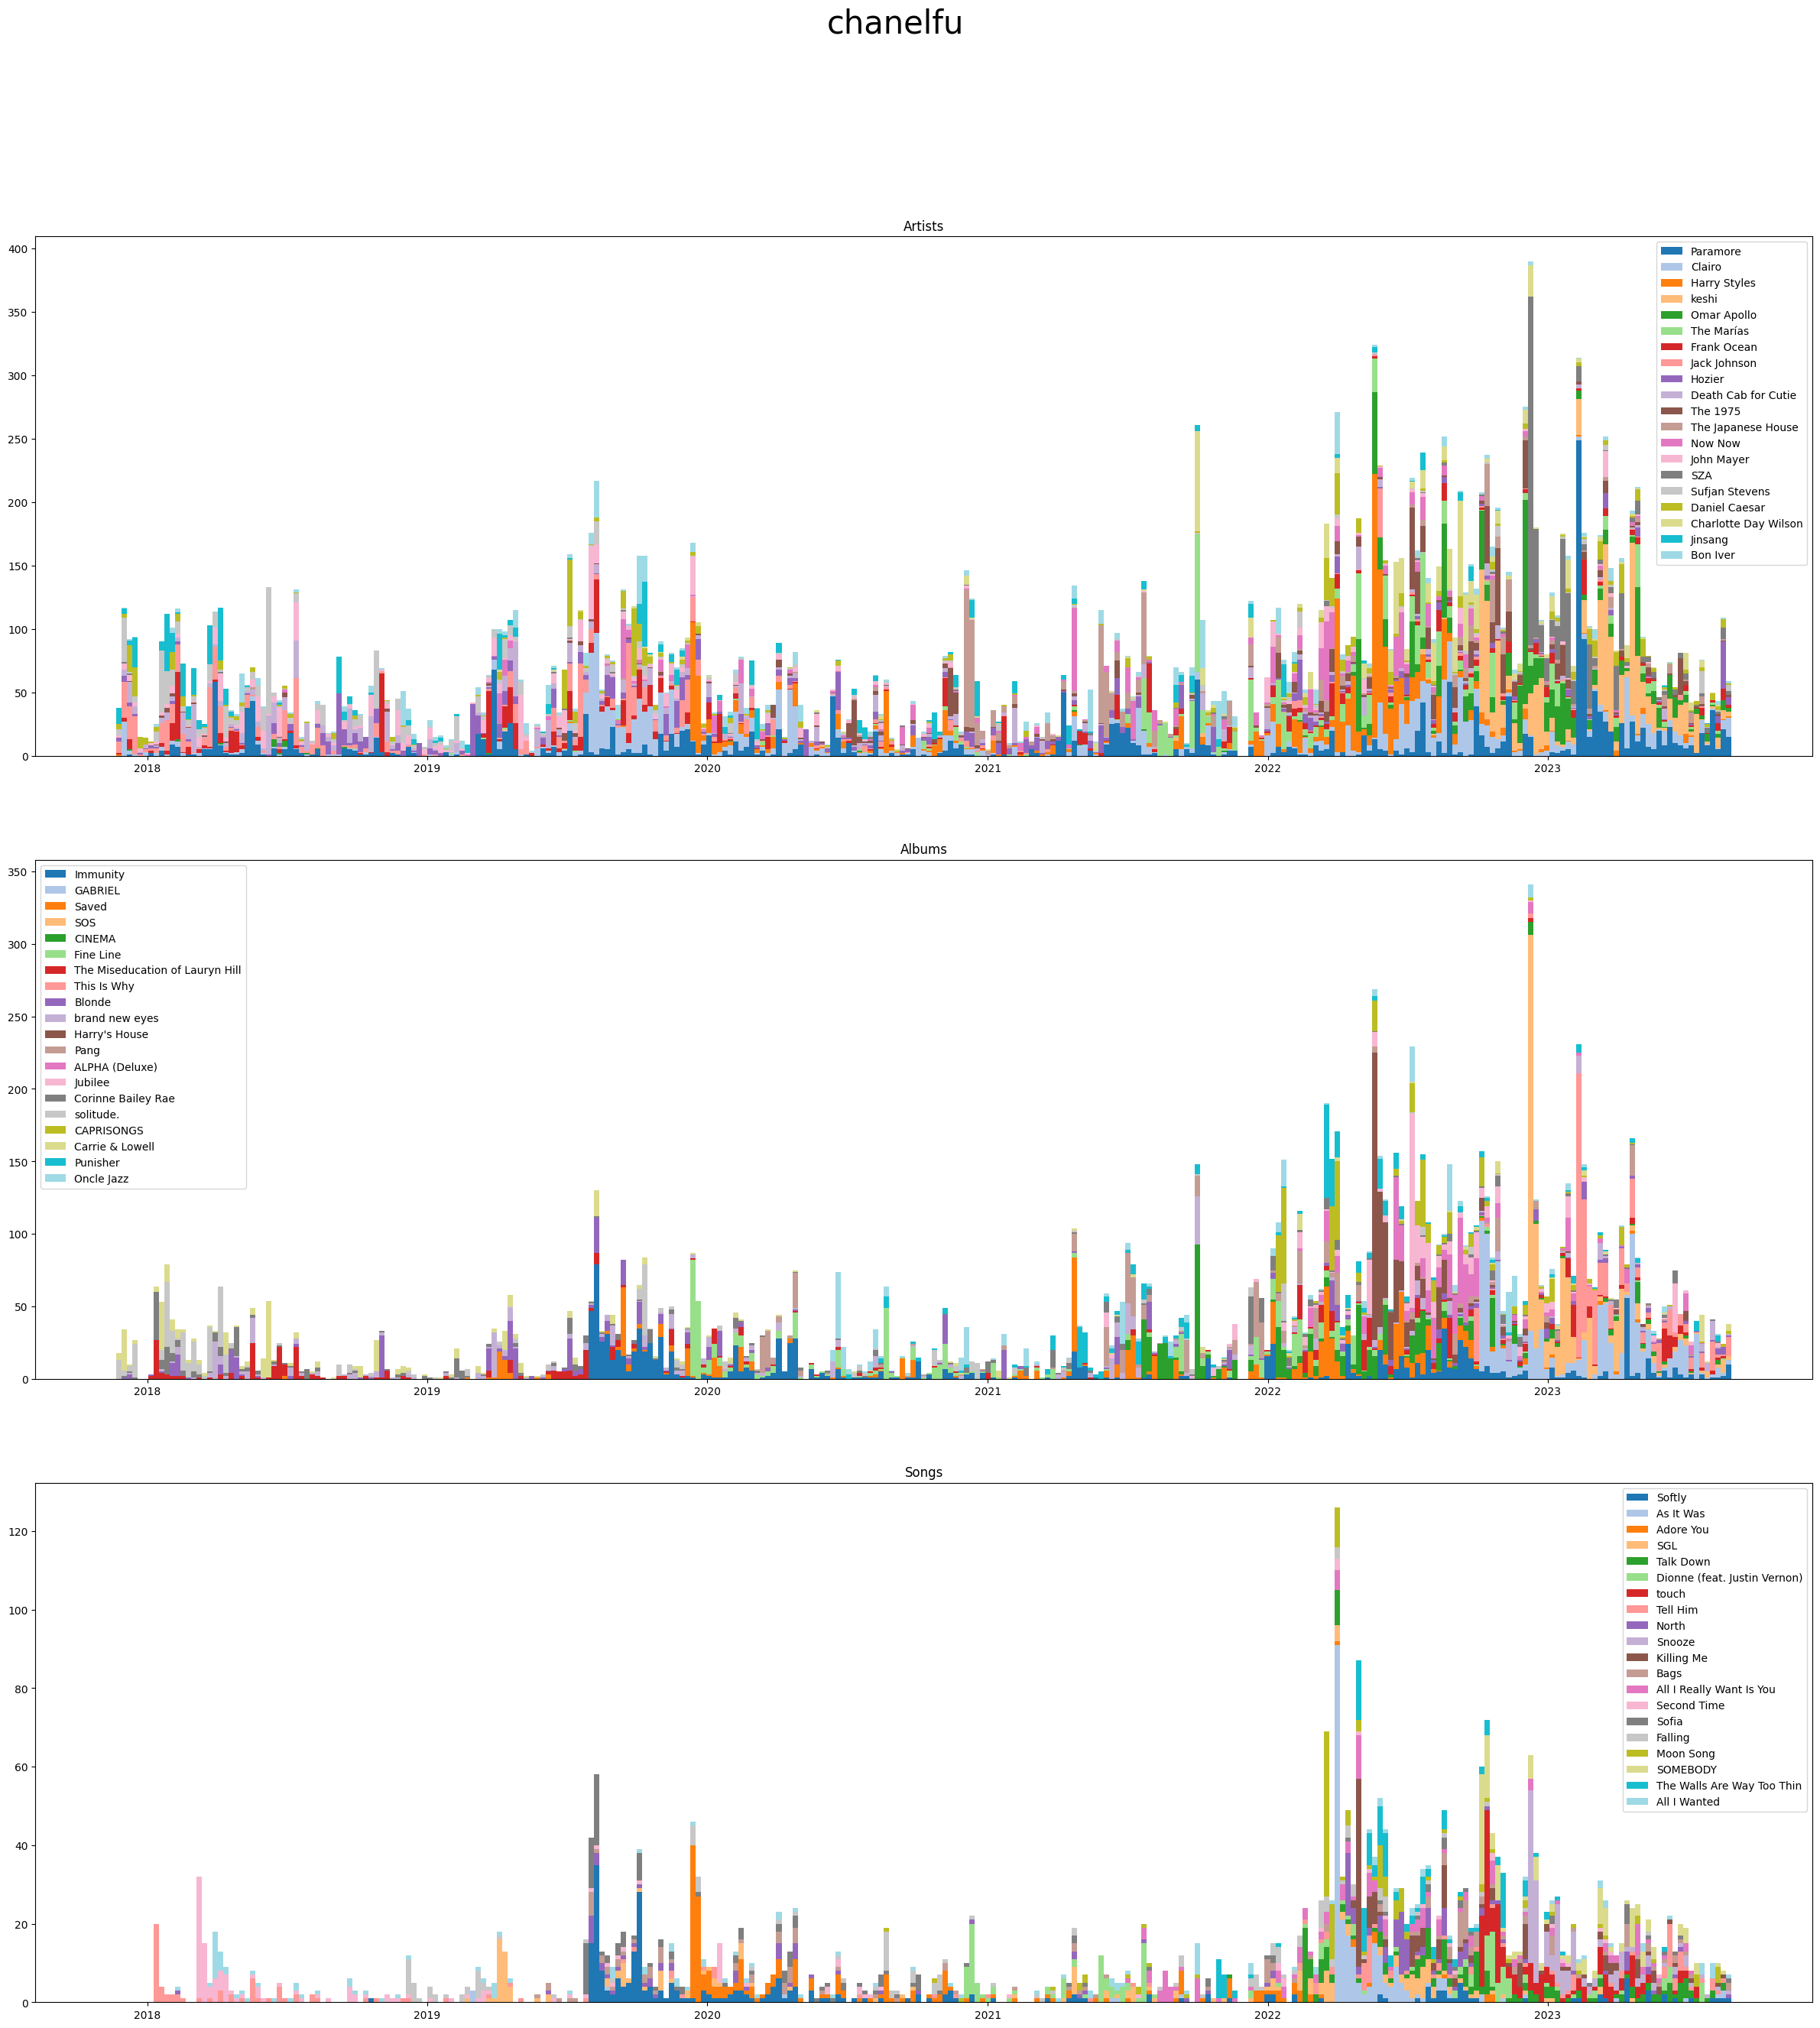

No file found for user poopiedumb


In [ ]:
usernames = ["turukano26",
             "dinasaur1",
             "lianshao",
             "celerellie",
             "chanelfu",
             "poopiedumb"]


for username in usernames:
    plot_user(20, username)

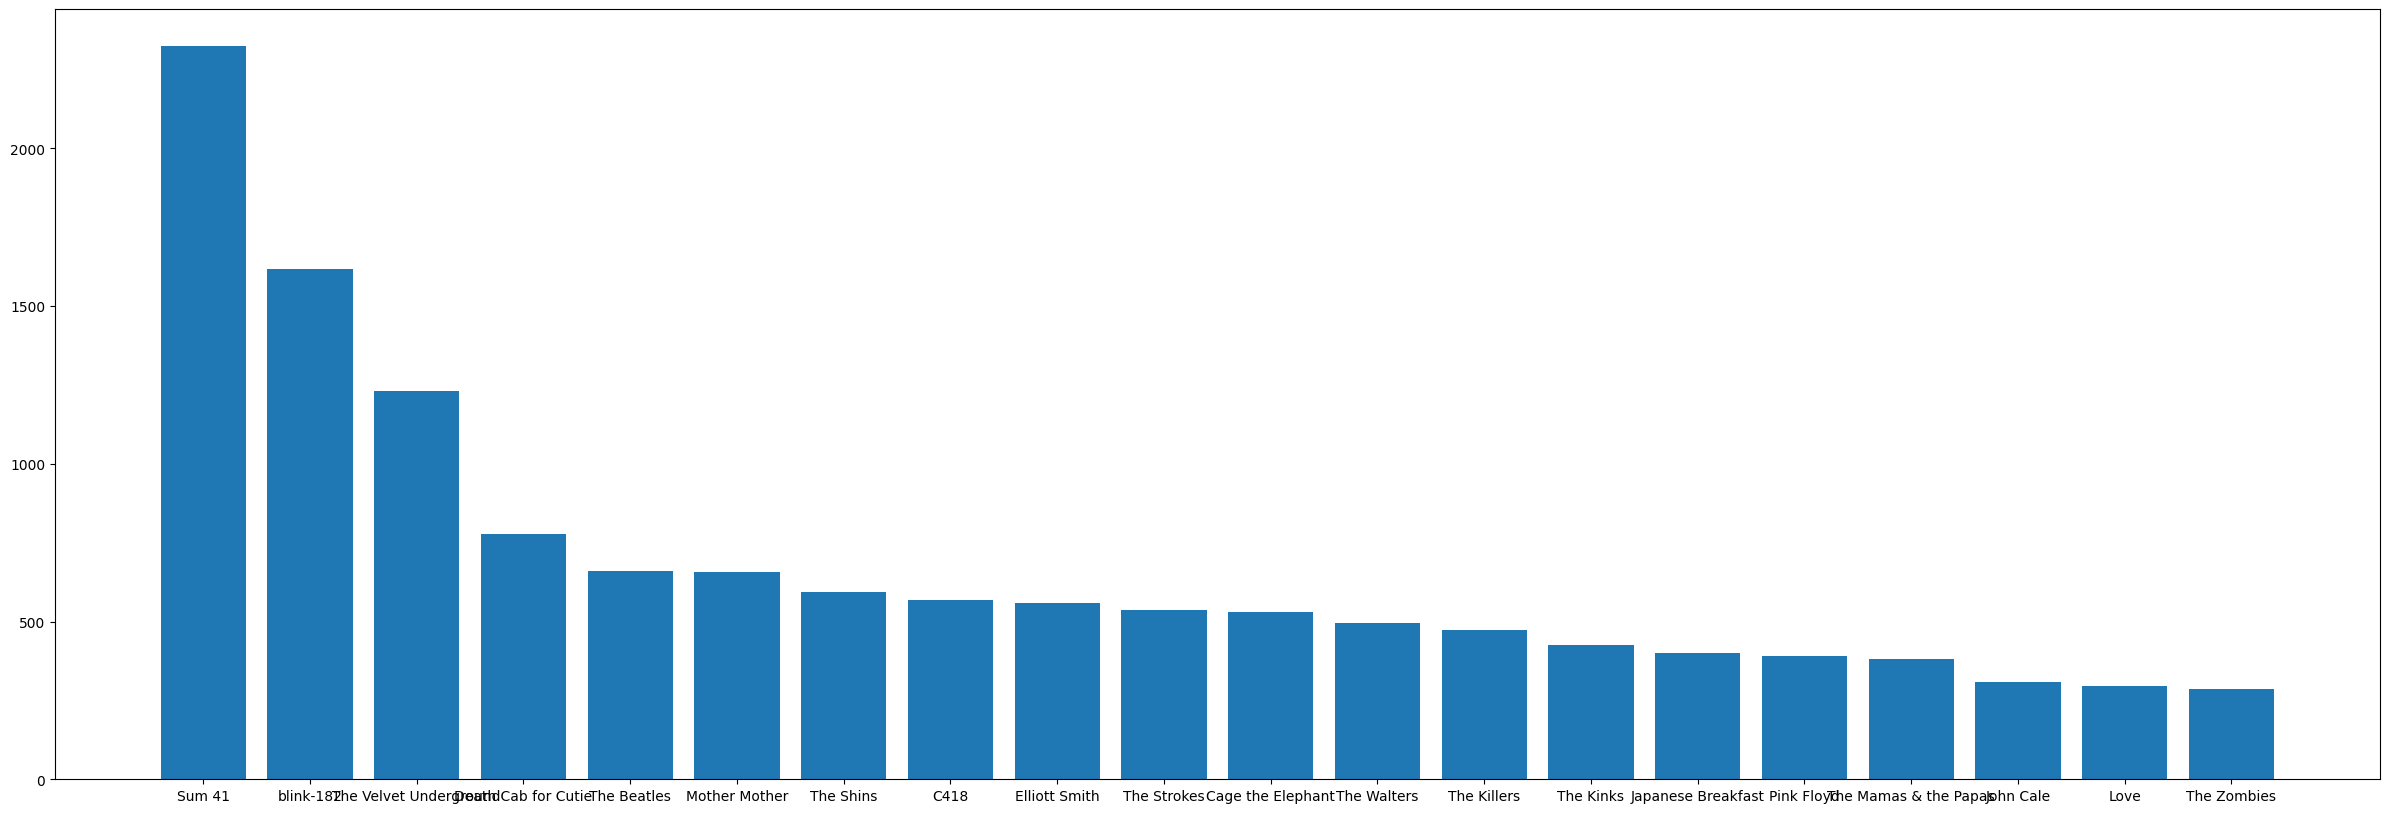

In [ ]:
plt.figure(figsize=(30,10))

plt.bar(top_artists, top_artist_counts)


plt.show()